In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os
from sqlalchemy import create_engine


### stations table processing

In [30]:
dfs = pd.read_csv("/Users/anita/Documents/SpringSemester/SoftwareEngineering/dataprediction/prediction/stations.csv", delimiter=';')

#print(dfs.tail())

In [34]:
station_names = dfs['nameStation'].tolist()

#print(station_names)

['SMITHFIELD NORTH', 'PARNELL SQUARE NORTH', 'CLONMEL STREET', 'AVONDALE ROAD', 'JAMES STREET EAST', 'MOUNT STREET LOWER', 'CHRISTCHURCH PLACE', 'GRANTHAM STREET', 'PEARSE STREET', 'YORK STREET EAST', 'EXCISE WALK', 'FITZWILLIAM SQUARE WEST', 'PORTOBELLO ROAD', 'PARNELL STREET', 'FREDERICK STREET SOUTH', 'FOWNES STREET UPPER', 'CLARENDON ROW', 'CUSTOM HOUSE', 'RATHDOWN ROAD', "NORTH CIRCULAR ROAD (O'CONNELL'S)", 'HANOVER QUAY', 'OLIVER BOND STREET', 'COLLINS BARRACKS MUSEUM', 'BROOKFIELD ROAD', 'BENSON STREET', 'EARLSFORT TERRACE', 'GOLDEN LANE', 'DEVERELL PLACE', 'WILTON TERRACE (PARK)', 'JOHN STREET WEST', 'FENIAN STREET', 'MERRION SQUARE SOUTH', 'SOUTH DOCK ROAD', 'CITY QUAY', 'EXCHEQUER STREET', 'THE POINT', 'BROADSTONE', 'HATCH STREET', 'LIME STREET', 'CHARLEMONT PLACE', 'KILMAINHAM GAOL', 'HARDWICKE PLACE', 'WOLFE TONE STREET', 'GREEK STREET', 'GUILD STREET', 'HERBERT PLACE', 'HIGH STREET', 'NORTH CIRCULAR ROAD', 'WESTERN WAY', 'TALBOT STREET', 'NEWMAN HOUSE', "SIR PATRICK DUN'S"

### availability table processing

In [25]:
dfa = pd.read_csv("/Users/anita/Documents/SpringSemester/SoftwareEngineering/dataprediction/prediction/availability.csv", delimiter=',', dtype={'nameStation': 'object'})

dfa.shape

(1329810, 6)

In [26]:
dfa.head()

,idAvailability,lastUpdate,availableBikeStands,availableBikes,status,nameStation
0,1,1677146149000,29,1,OPEN,NaN
1,2,1677145763000,11,9,OPEN,NaN
2,3,1677145884000,12,20,OPEN,NaN
3,4,1677146069000,27,8,OPEN,NaN
4,5,1677145641000,7,23,OPEN,NaN


In [36]:
# Update the nameStation column with the station names cyclically
def nameupdate():
    num_stations = len(station_names)
    print("num_stations:", num_stations)
    num_rows = len(dfa)
    print("num_rows:", num_rows)
    indices = np.arange(num_rows) % num_stations
    print("indices:", indices)
    dfa["nameStation"] = [station_names[i] for i in indices]
nameupdate()


num_stations: 114
num_rows: 1329810
indices: [  0   1   2 ... 111 112 113]


In [37]:
dfa.head()

,idAvailability,lastUpdate,availableBikeStands,availableBikes,status,nameStation
0,1,1677146149000,29,1,OPEN,SMITHFIELD NORTH
1,2,1677145763000,11,9,OPEN,PARNELL SQUARE NORTH
2,3,1677145884000,12,20,OPEN,CLONMEL STREET
3,4,1677146069000,27,8,OPEN,AVONDALE ROAD
4,5,1677145641000,7,23,OPEN,JAMES STREET EAST


In [38]:
dfa['lastUpdate'] = pd.to_datetime(dfa['lastUpdate'], unit='ms')

In [54]:
# extract the hour from the lastUpdate column and create a new column
dfa['hour'] = dfa['lastUpdate'].dt.hour
dfa['date'] = dfa['lastUpdate'].dt.date
dfa.head()

,idAvailability,lastUpdate,availableBikeStands,availableBikes,status,nameStation,hour,date
0,1,2023-02-23 09:55:49,29,1,OPEN,SMITHFIELD NORTH,9,2023-02-23
1,2,2023-02-23 09:49:23,11,9,OPEN,PARNELL SQUARE NORTH,9,2023-02-23
2,3,2023-02-23 09:51:24,12,20,OPEN,CLONMEL STREET,9,2023-02-23
3,4,2023-02-23 09:54:29,27,8,OPEN,AVONDALE ROAD,9,2023-02-23
4,5,2023-02-23 09:47:21,7,23,OPEN,JAMES STREET EAST,9,2023-02-23


In [40]:
grouped = dfa.groupby(['nameStation', 'hour']).size().reset_index(name='counts')
print(grouped)

           nameStation  hour  counts
0        AVONDALE ROAD     0     486
1        AVONDALE ROAD     1     501
2        AVONDALE ROAD     2     490
3        AVONDALE ROAD     3     484
4        AVONDALE ROAD     4     498
...                ...   ...     ...
2731  YORK STREET WEST    19     483
2732  YORK STREET WEST    20     477
2733  YORK STREET WEST    21     508
2734  YORK STREET WEST    22     480
2735  YORK STREET WEST    23     483

[2736 rows x 3 columns]


### weather data processing

In [46]:
dfw = pd.read_csv("/Users/anita/Documents/SpringSemester/SoftwareEngineering/dataprediction/prediction/weatherdata.csv", delimiter=';')

dfw.shape

(11628, 5)

In [47]:
dfw.head()

,idweather,precipInMm,tempInC,windInKph,timeInDublin
0,1,0.0,6.0,22.0,1677364200
1,2,0.1,6.0,13.0,1677746700
2,3,0.3,6.0,11.2,1677748500
3,4,0.0,6.0,16.9,1678051800
4,5,0.0,6.0,15.1,1678052700


In [52]:
dfw['timeInDublin'] = pd.to_datetime(dfw['timeInDublin'], unit='s')
dfw['date'] = dfw['timeInDublin'].dt.date
dfw['hour'] = dfw['timeInDublin'].dt.hour

In [53]:
dfw.head()

,idweather,precipInMm,tempInC,windInKph,timeInDublin,hour,date
0,1,0.0,6.0,22.0,2023-02-25 22:30:00,22,2023-02-25
1,2,0.1,6.0,13.0,2023-03-02 08:45:00,8,2023-03-02
2,3,0.3,6.0,11.2,2023-03-02 09:15:00,9,2023-03-02
3,4,0.0,6.0,16.9,2023-03-05 21:30:00,21,2023-03-05
4,5,0.0,6.0,15.1,2023-03-05 21:45:00,21,2023-03-05


In [55]:
merged_df = pd.merge(dfw, dfa, on=['date', 'hour'])


In [56]:
merged_df.head()

,idweather,precipInMm,tempInC,windInKph,timeInDublin,hour,date,idAvailability,lastUpdate,availableBikeStands,availableBikes,status,nameStation
0,1,0.0,6.0,22.0,2023-02-25 22:30:00,22,2023-02-25,229,2023-02-25 22:01:33,2,28,OPEN,SMITHFIELD NORTH
1,1,0.0,6.0,22.0,2023-02-25 22:30:00,22,2023-02-25,233,2023-02-25 22:06:04,27,3,OPEN,JAMES STREET EAST
2,1,0.0,6.0,22.0,2023-02-25 22:30:00,22,2023-02-25,234,2023-02-25 22:04:16,20,20,OPEN,MOUNT STREET LOWER
3,1,0.0,6.0,22.0,2023-02-25 22:30:00,22,2023-02-25,236,2023-02-25 22:02:36,17,13,OPEN,GRANTHAM STREET
4,1,0.0,6.0,22.0,2023-02-25 22:30:00,22,2023-02-25,237,2023-02-25 22:03:27,19,11,OPEN,PEARSE STREET


In [69]:
merged_df.shape

(15884338, 13)

In [68]:
merged_df.to_csv('/Users/anita/Documents/SpringSemester/SoftwareEngineering/dataprediction/prediction/merged_data.csv', index=False)


### linear regression

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [72]:


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[['precipInMm']], merged_df['availableBikes'], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Mean squared error: 88.28955069471591


In [65]:
print(station_df[['precipInMm', 'tempInC']].shape)
print(hourly_mean_availability.shape)


(139458, 2)
(24,)


/Users/anita/opt/anaconda3/envs/python_oop/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


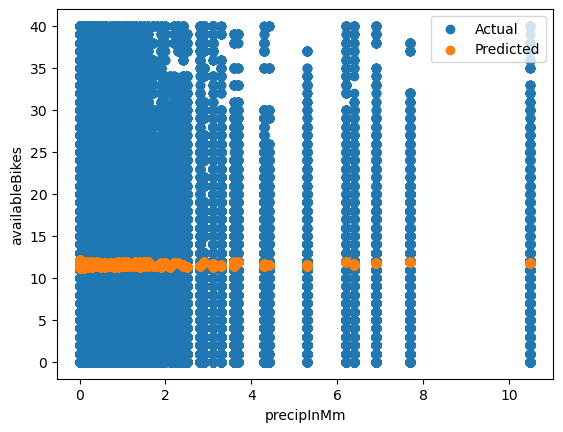

In [62]:
# Create a scatter plot of the test set
plt.scatter(X_test['availableBikes'], y_test, label='Actual')
plt.scatter(X_test['availableBikes'], y_pred, label='Predicted')
plt.xlabel('availableBikes')
plt.ylabel('precip in mm')
plt.legend()
plt.show()

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of unique station names
stations = merged_df['nameStation'].unique()

# Loop through each station and create a plot
for station in stations:
    # Filter the data for the current station
    station_df = merged_df[merged_df['nameStation'] == station]
    
    hourly_mean_availability = station_df.groupby('hour')['availableBikes'].mean()
    hourly_predictions = pd.DataFrame({'Hourly Mean Availability': hourly_mean_availability,
                                   'Predicted Availability': model.predict(station_df[['precipInMm', 'tempInC']])},
                                  index=hourly_mean_availability.index)
    
    # Create a plot of the hourly mean availability and the predicted availability
    fig, ax = plt.subplots()
    hourly_predictions.plot(ax=ax)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Bike Availability')
    ax.set_title(station)
    
    # Show the plot
    plt.show()


ValueError: Length of values (139458) does not match length of index (24)

In [ ]:
import numpy as np

if np.isnan(w).any():
    print("Sample weight array contains NaN values")
else:
    print("Sample weight array does not contain NaN values")


In [60]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[['precipInMm', 'tempInC']], merged_df['availableBikes'], test_size=0.2, random_state=42)

# Calculate weights for training set
weights_train = 1 / np.sqrt(y_train)

# Fit linear regression model with weights
model = LinearRegression()
model.fit(X_train, y_train, sample_weight=weights_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print results
print("Mean squared error:", mse)


ValueError: Input sample_weight contains infinity or a value too large for dtype('float64').

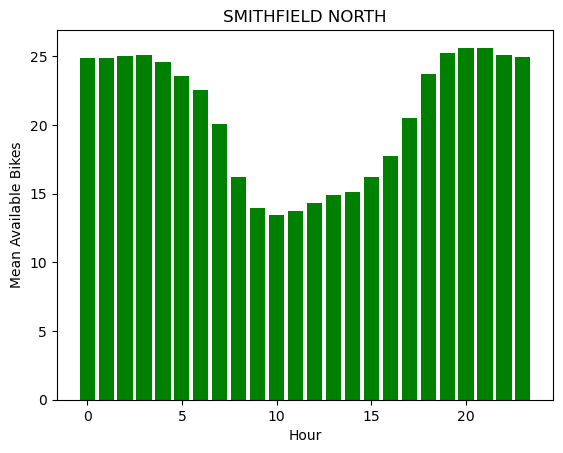

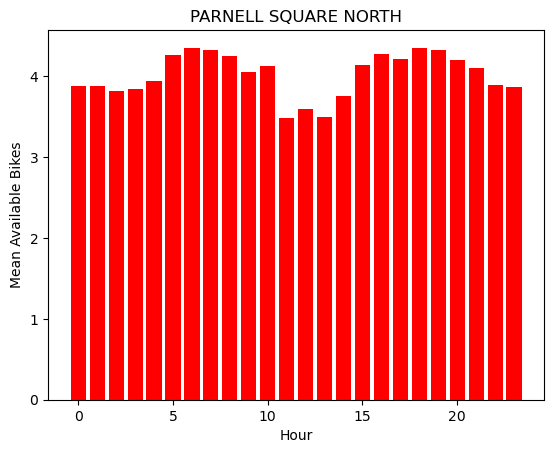

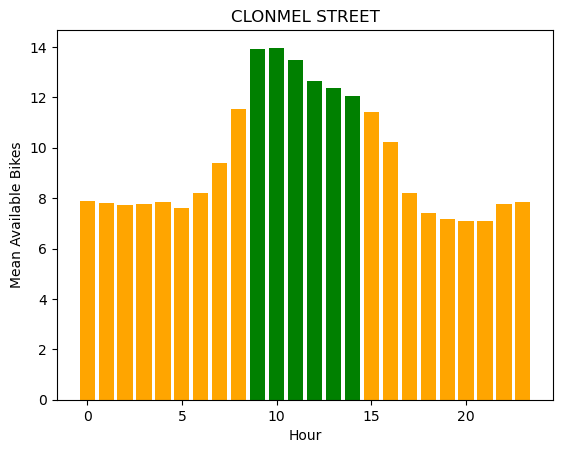

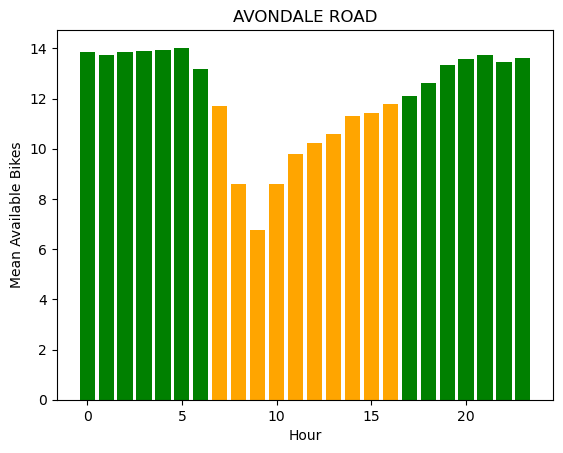

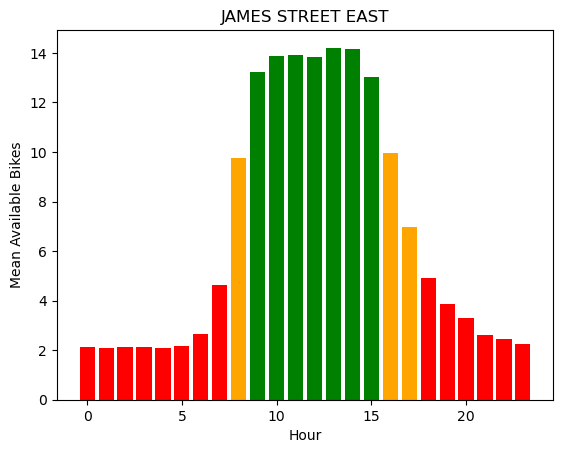

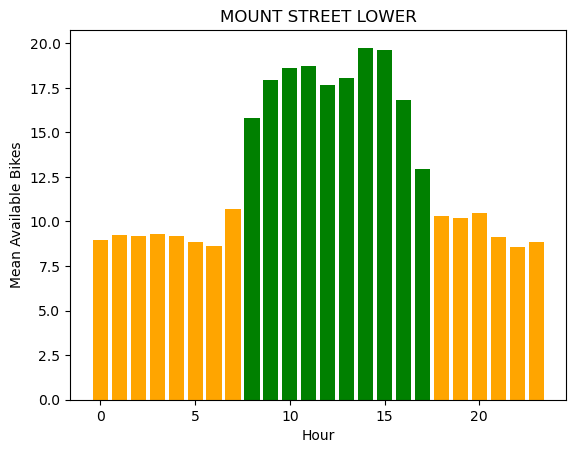

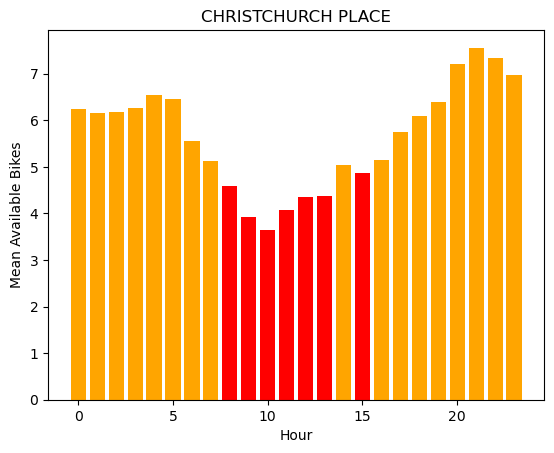

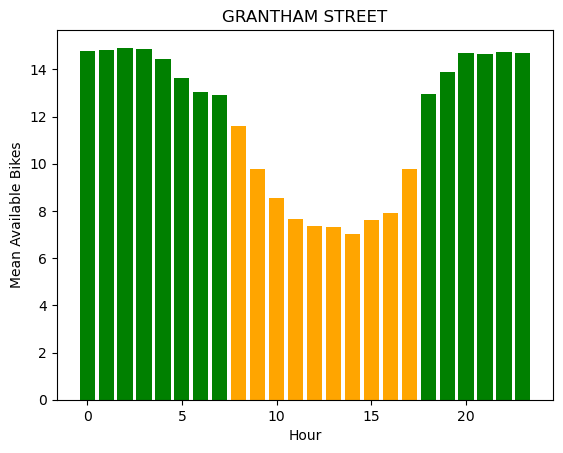

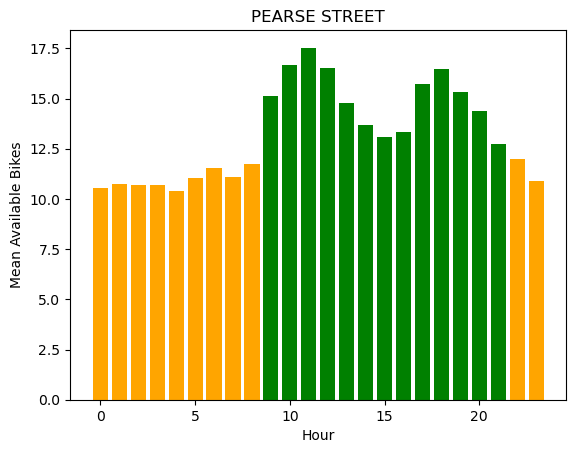

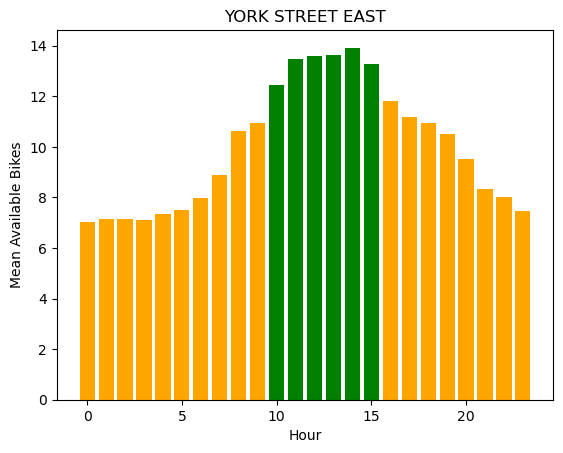

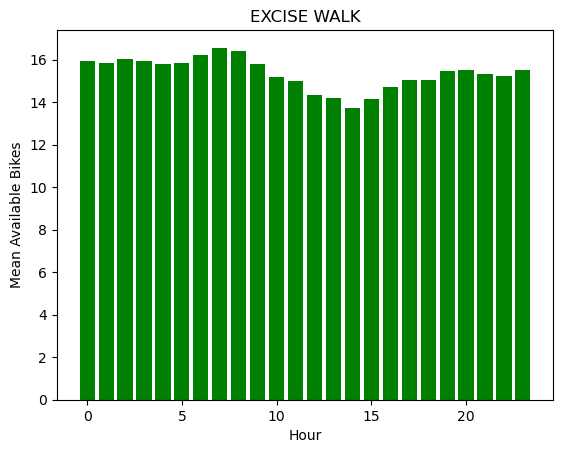

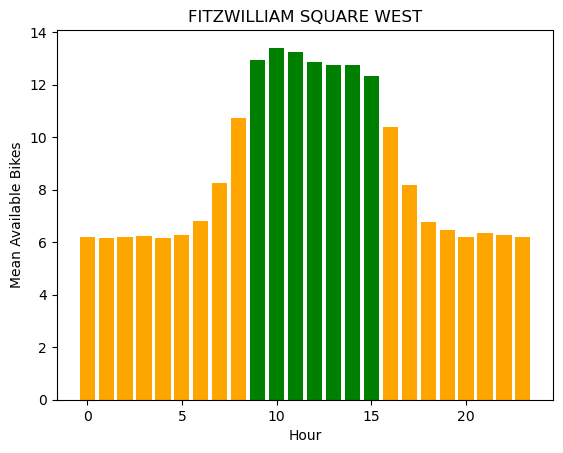

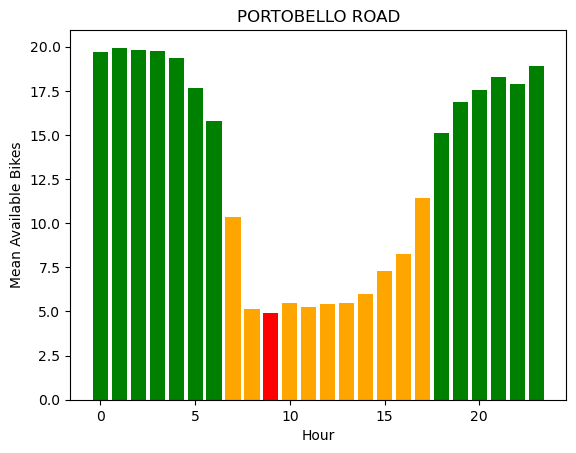

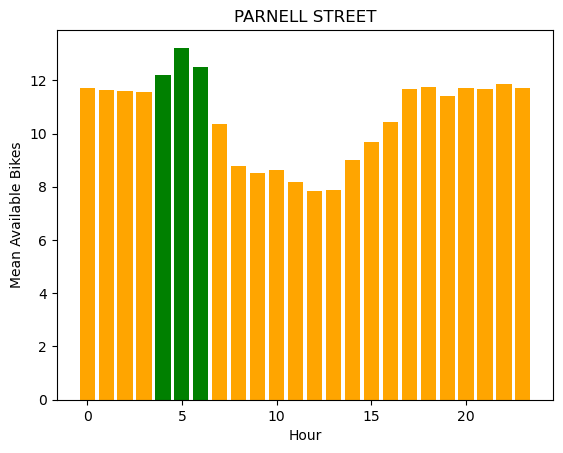

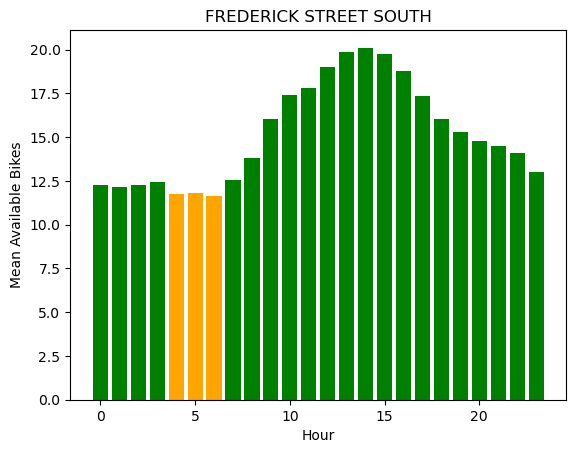

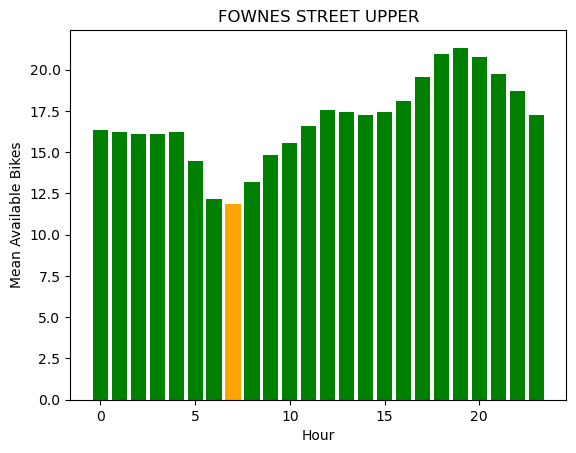

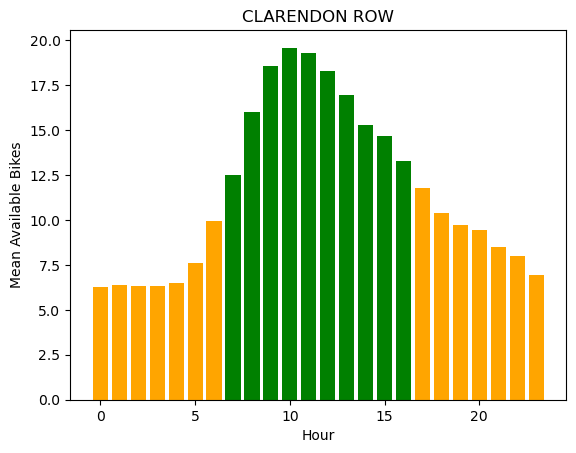

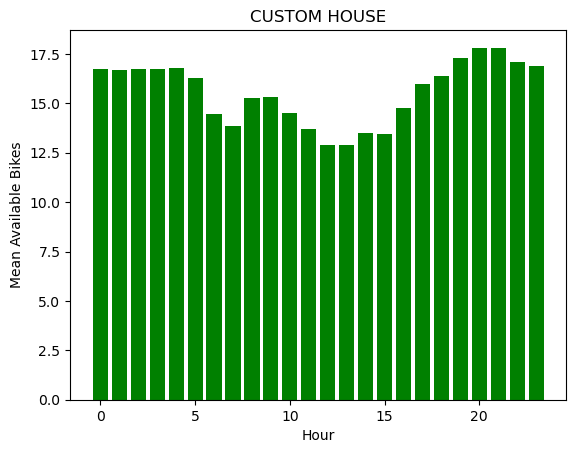

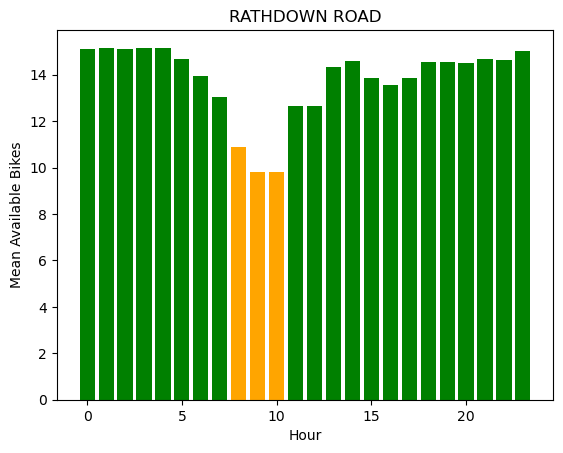

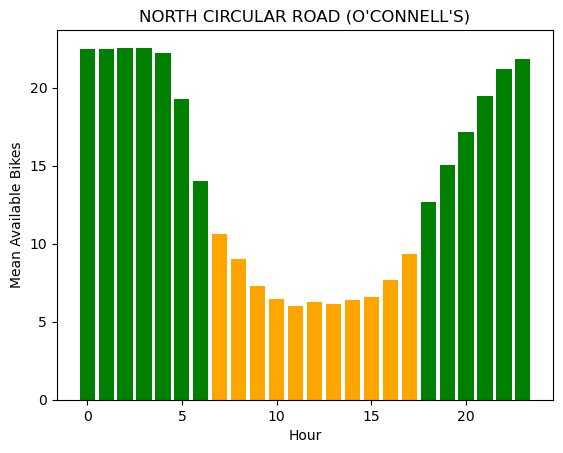

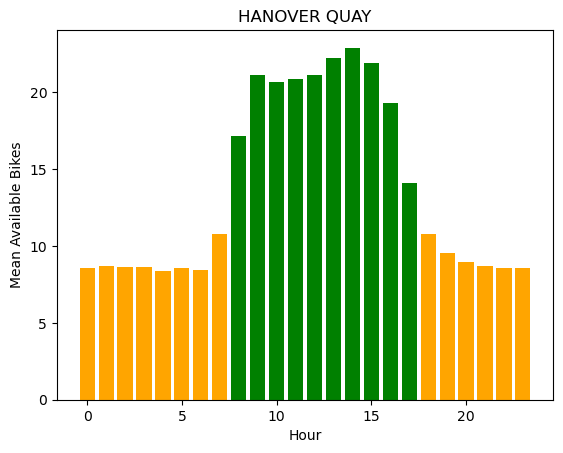

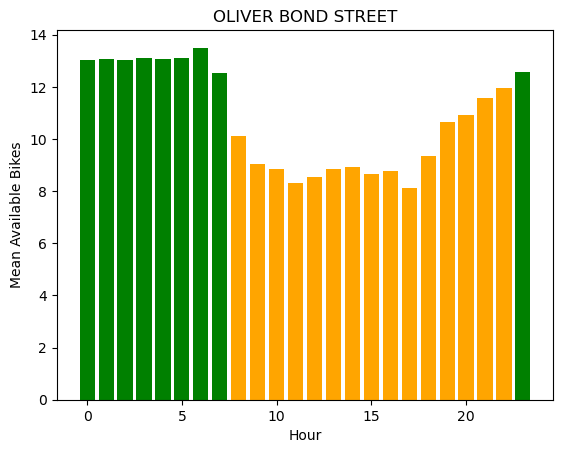

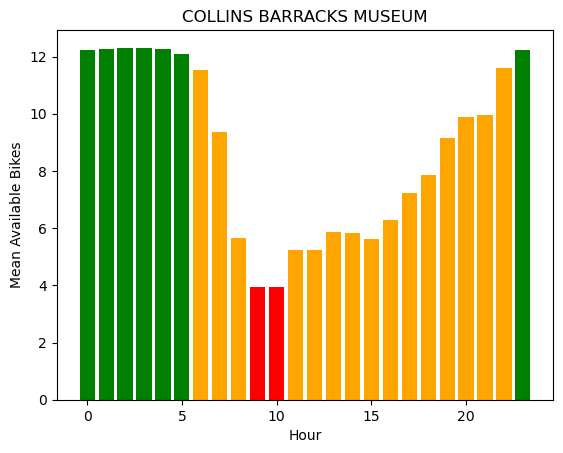

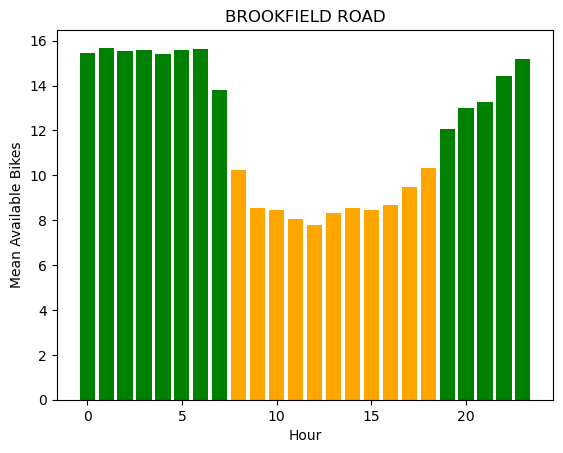

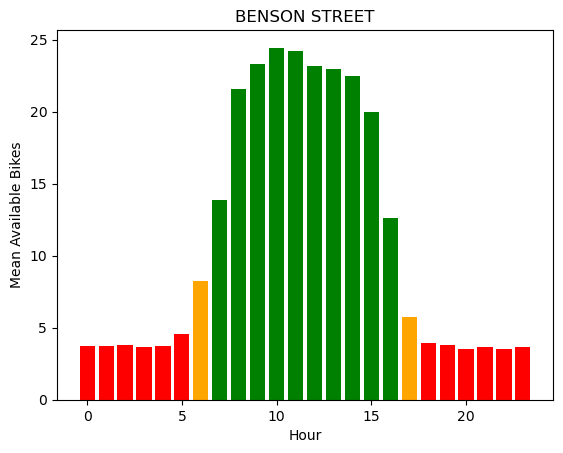

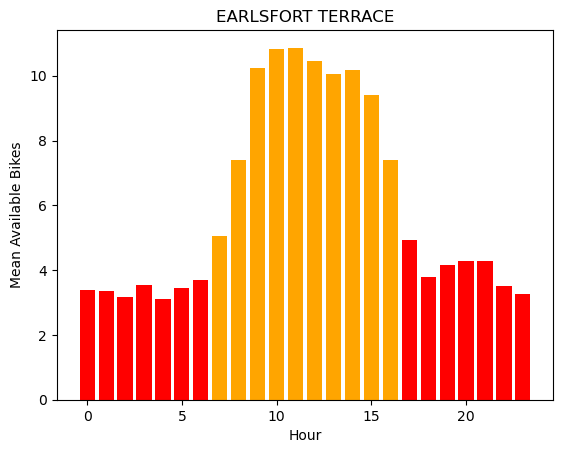

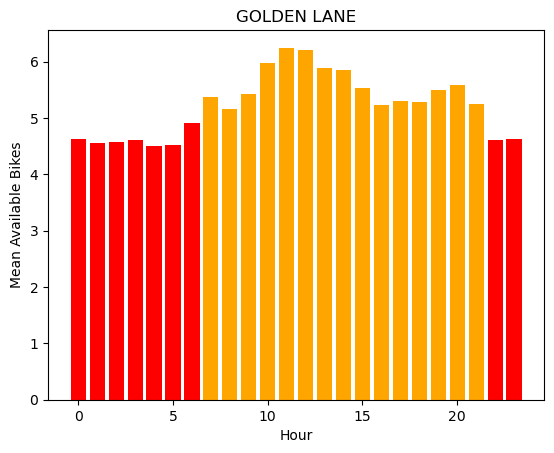

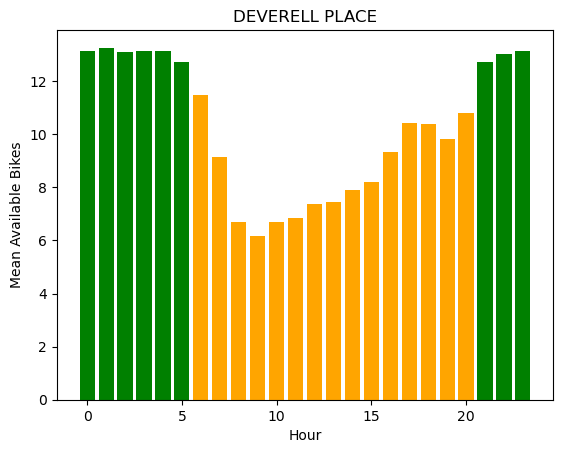

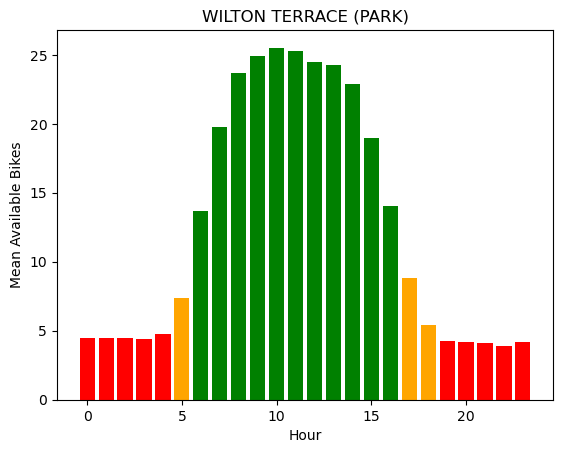

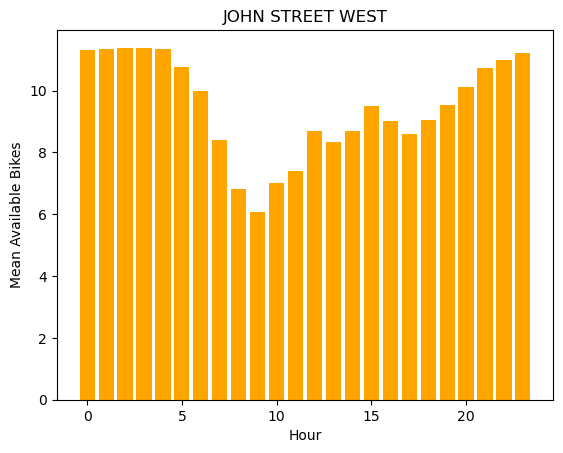

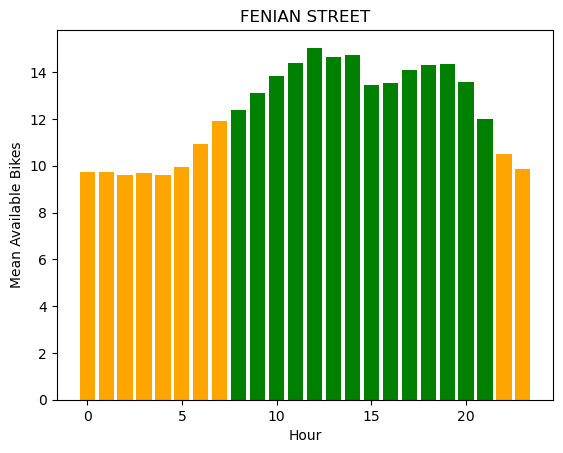

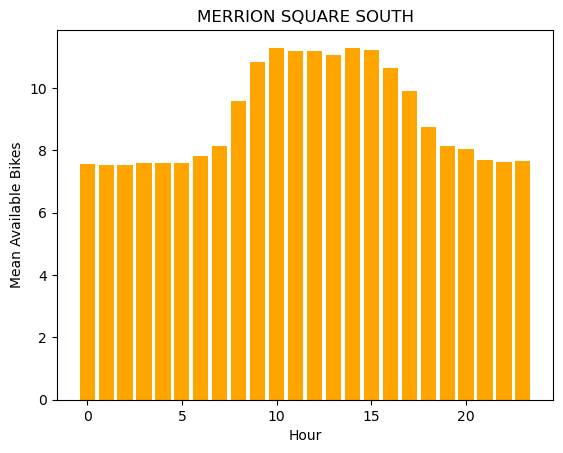

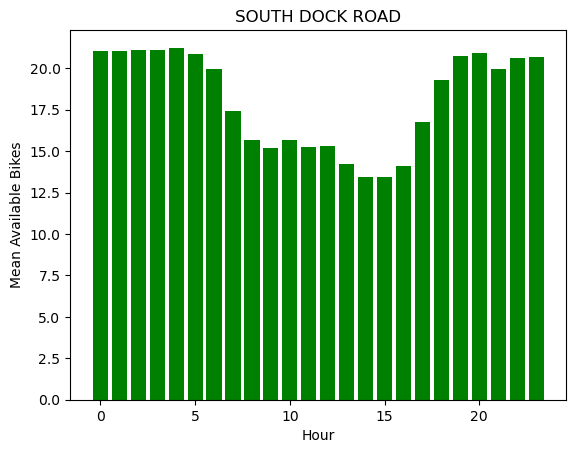

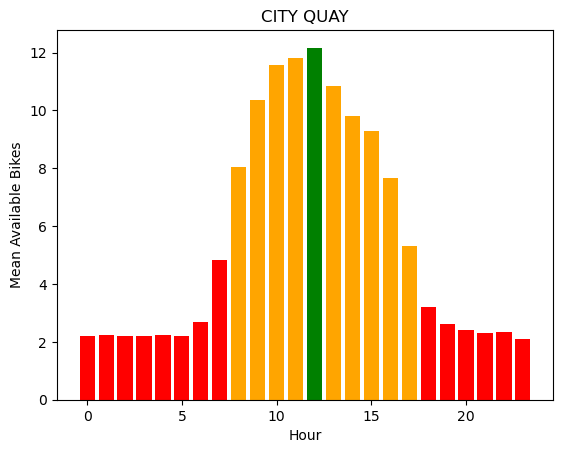

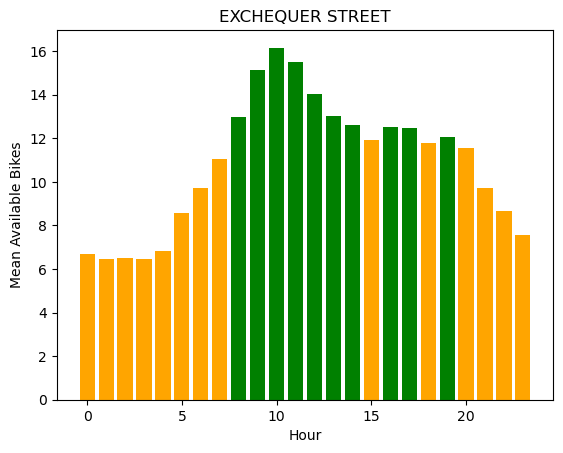

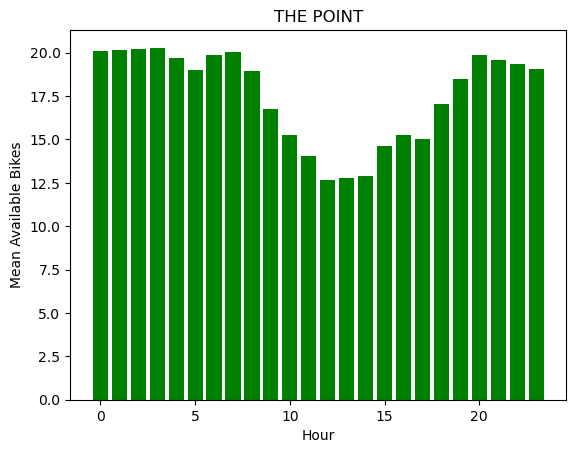

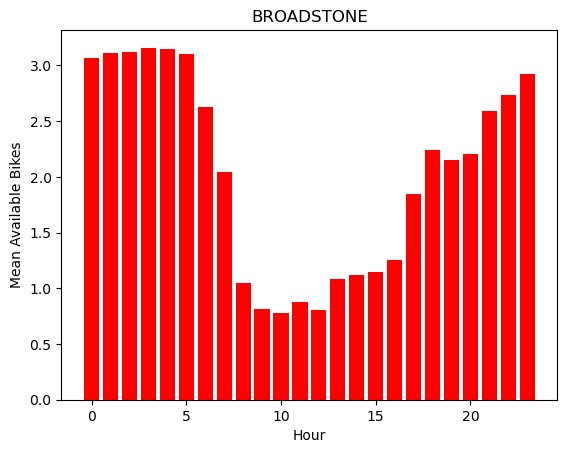

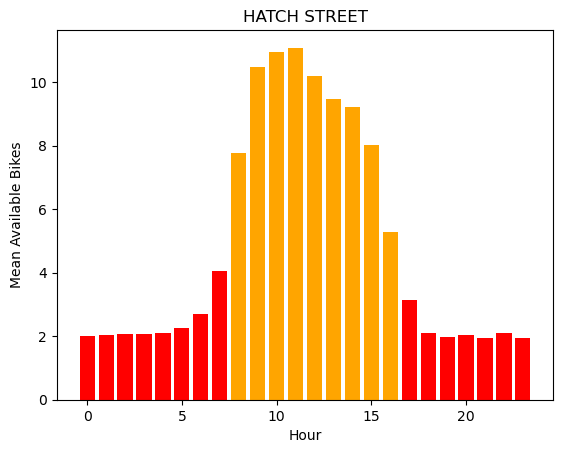

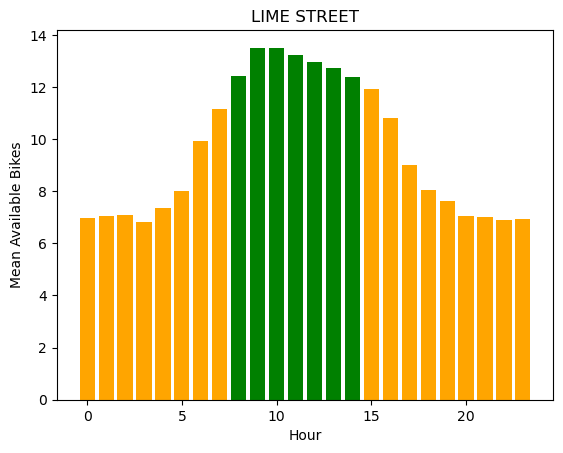

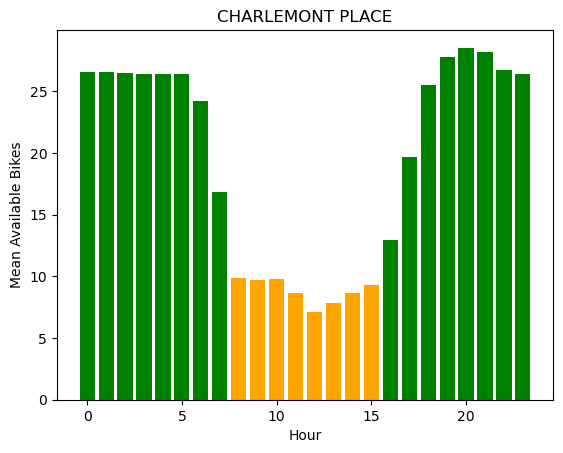

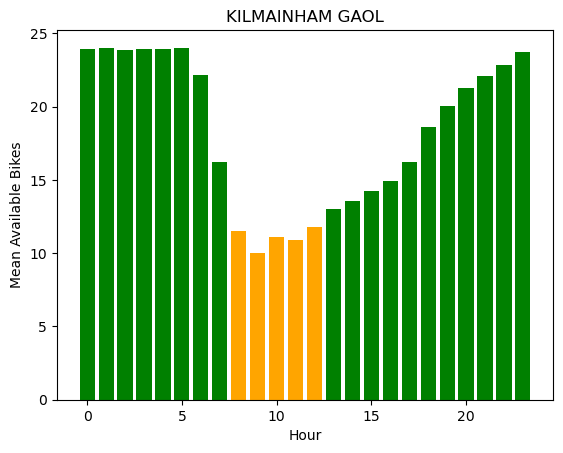

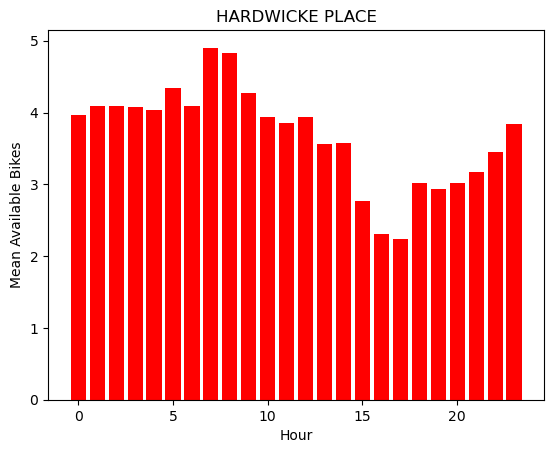

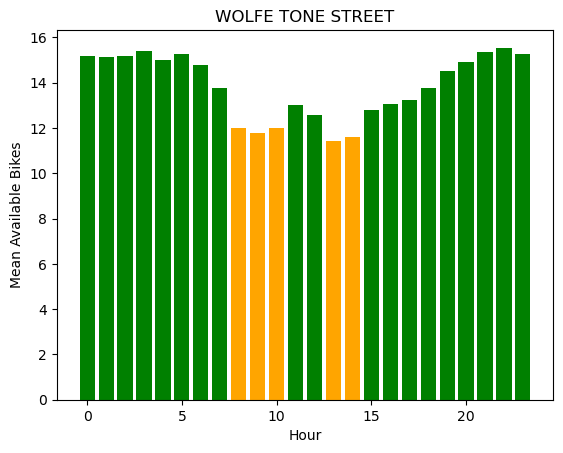

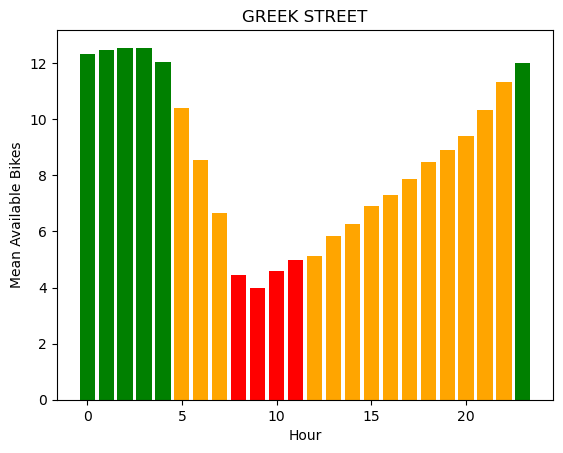

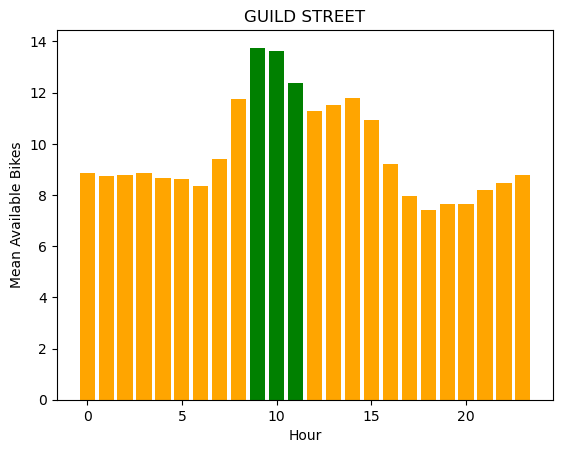

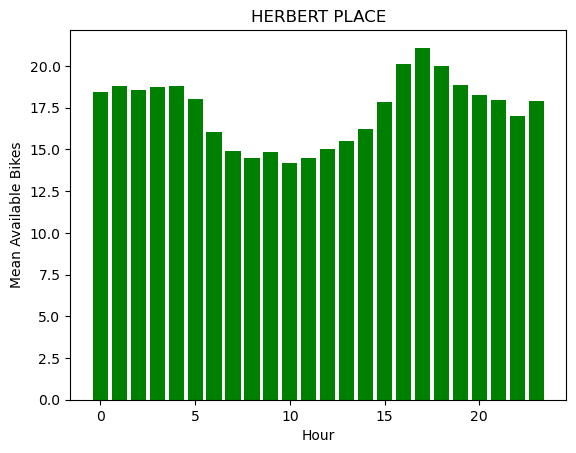

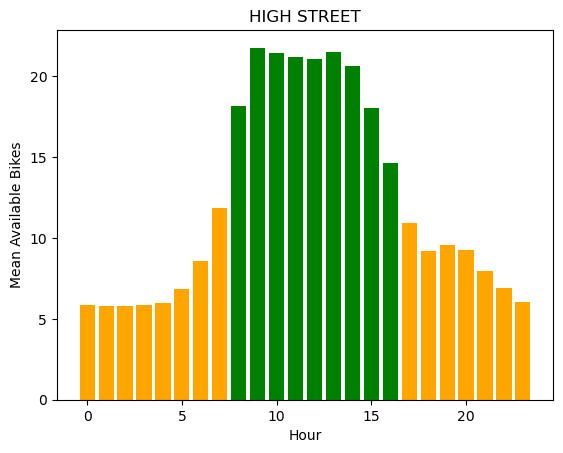

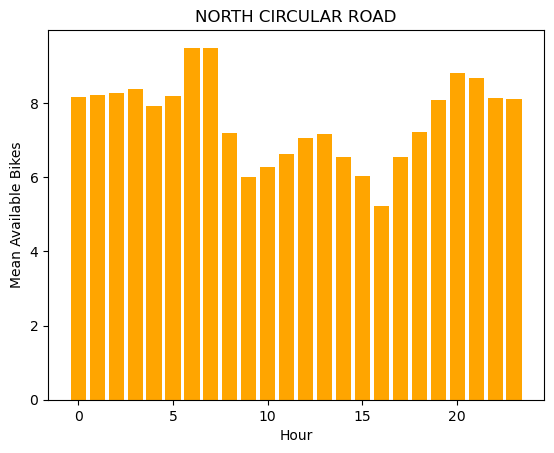

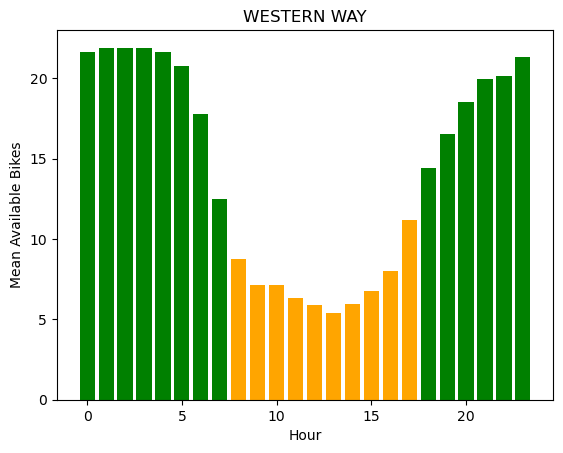

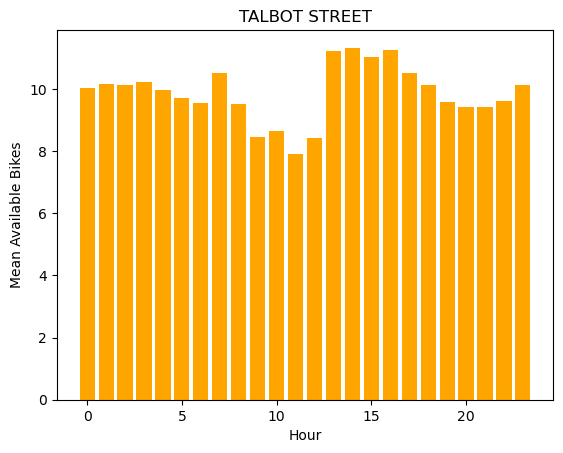

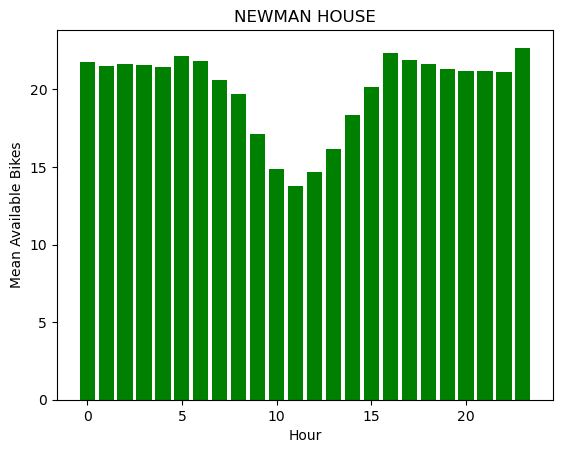

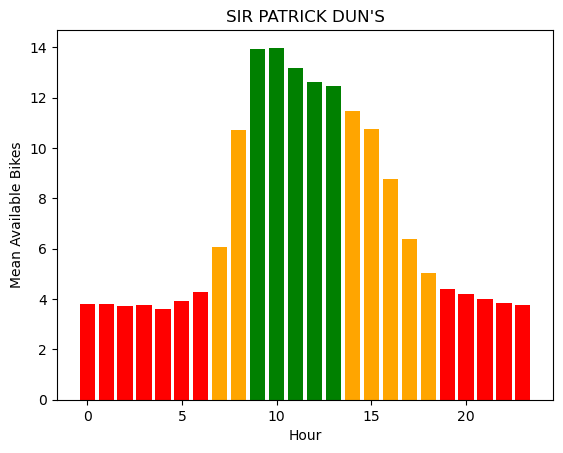

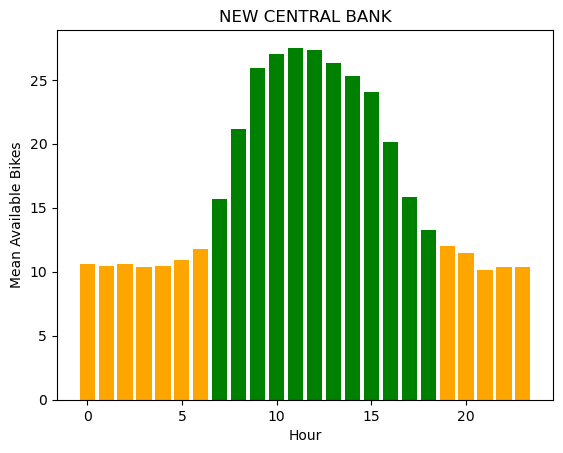

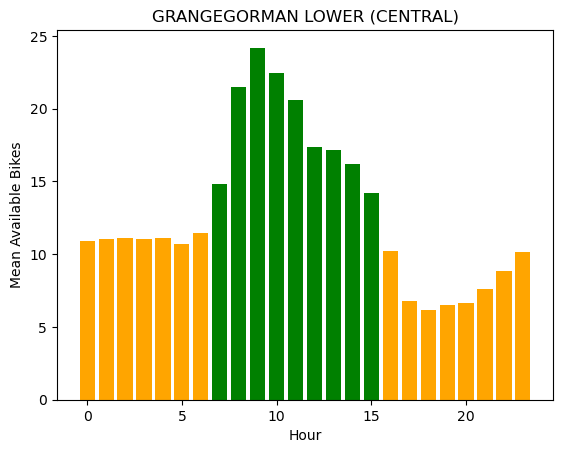

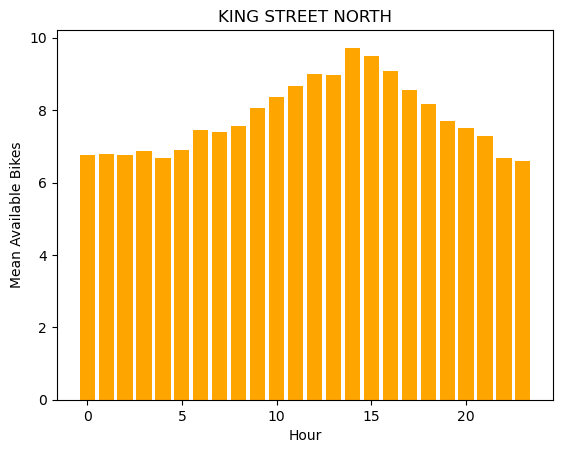

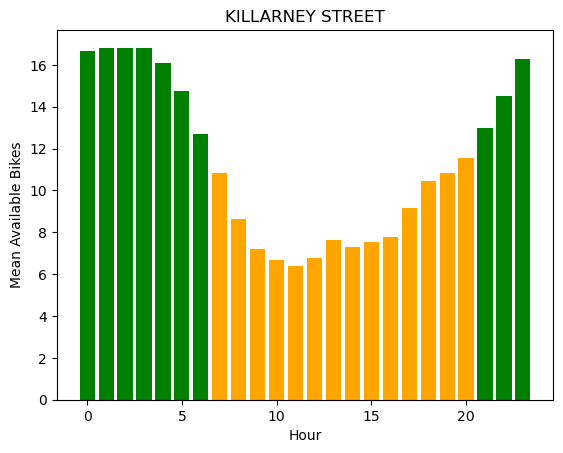

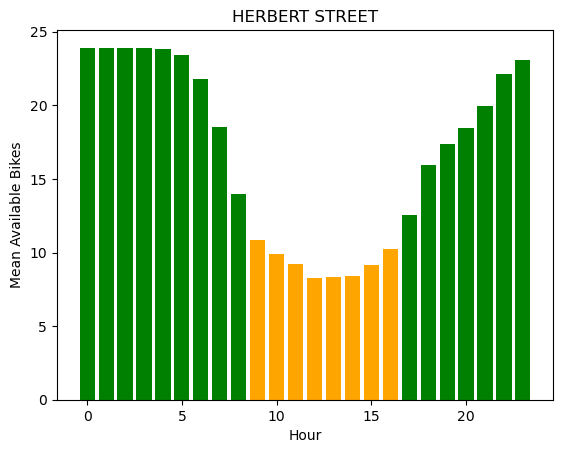

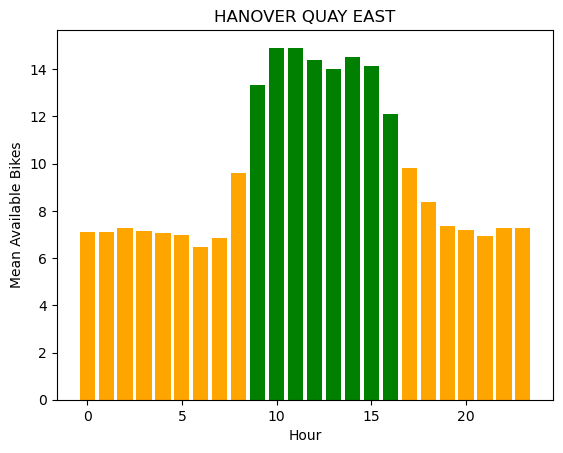

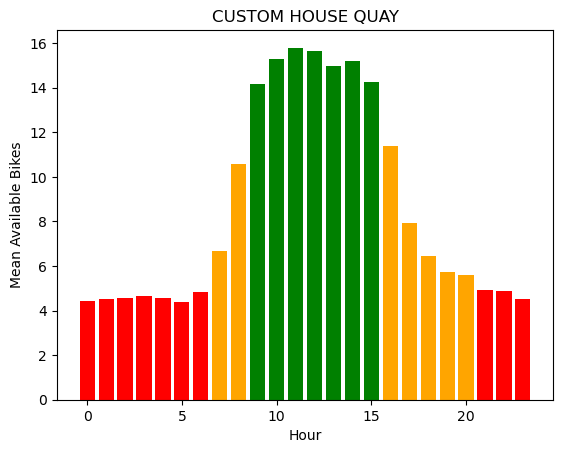

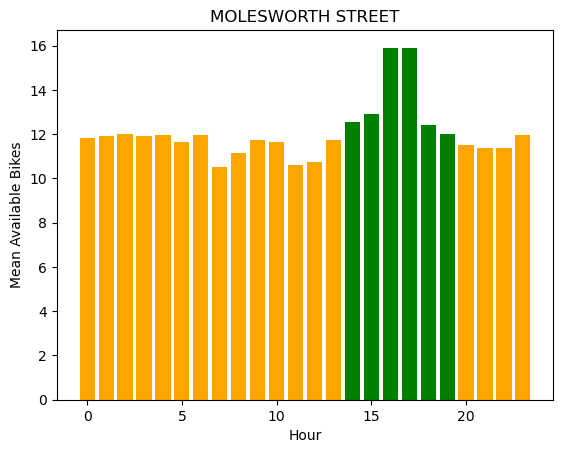

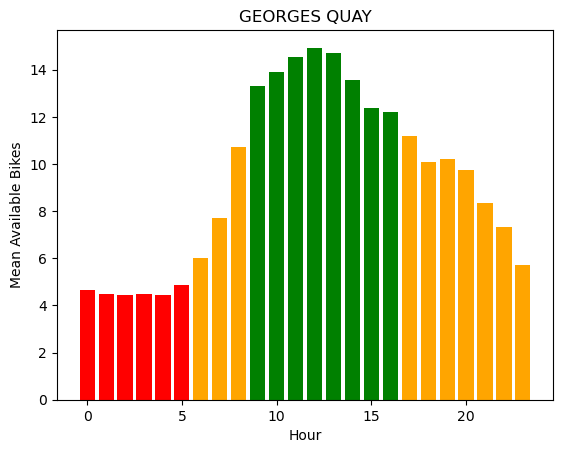

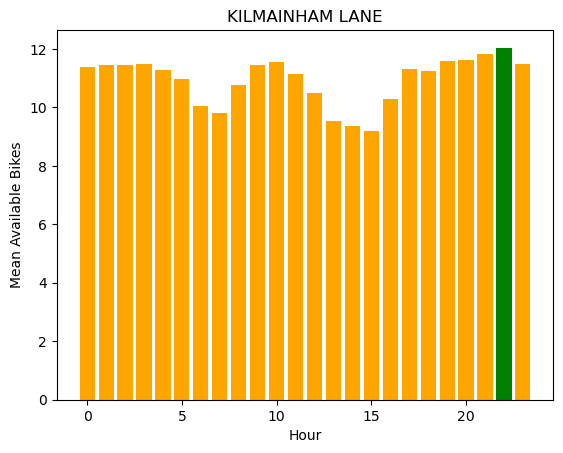

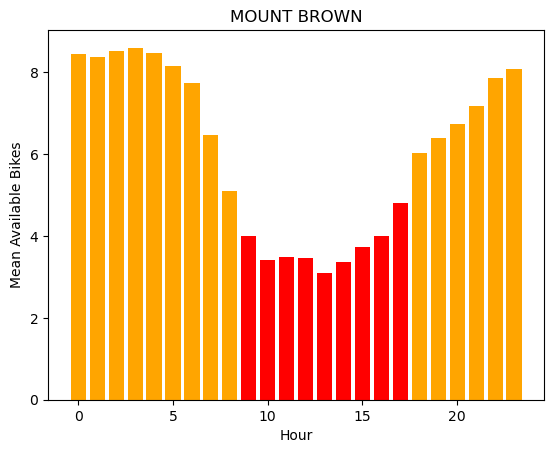

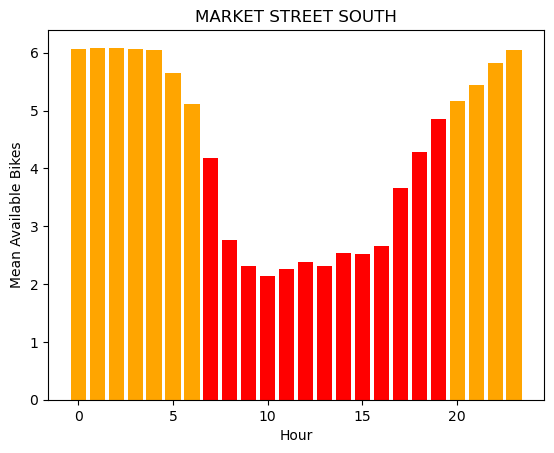

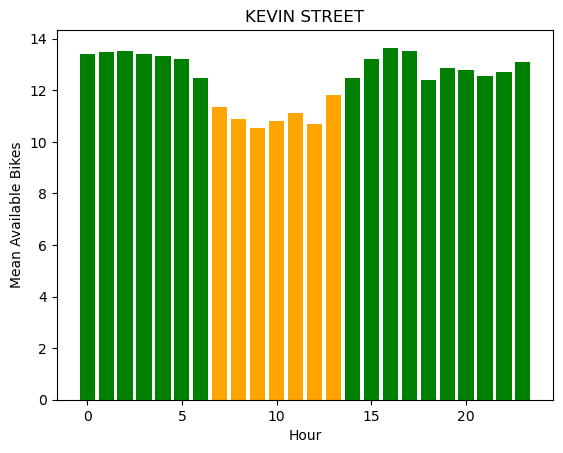

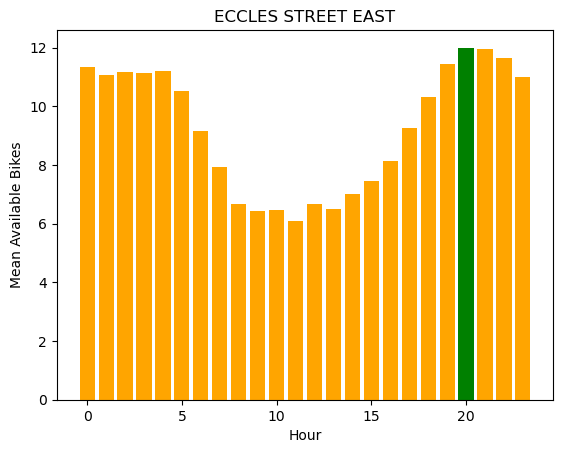

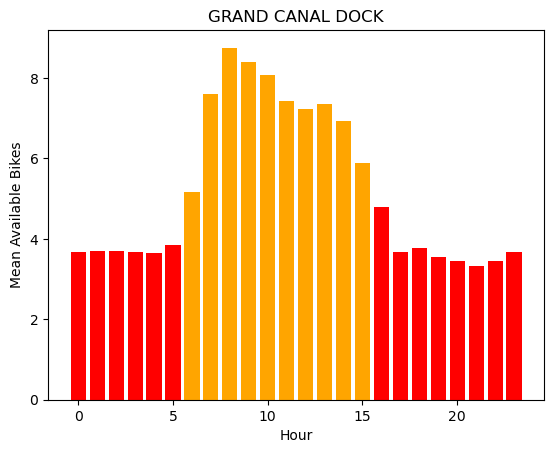

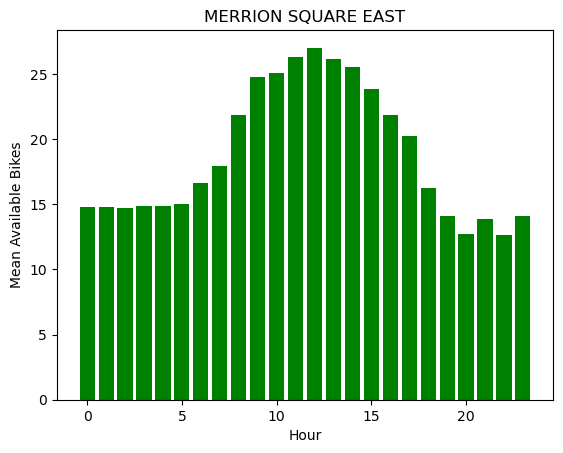

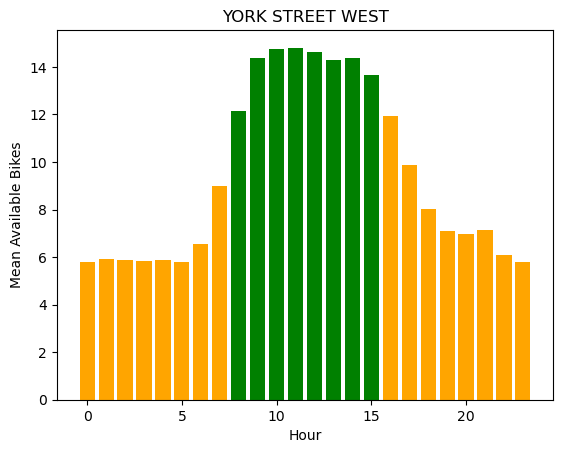

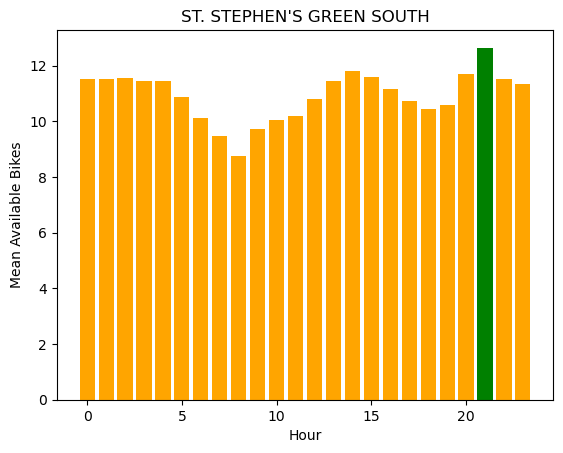

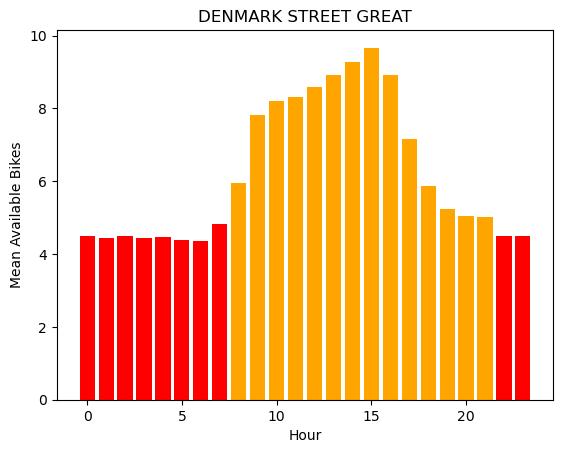

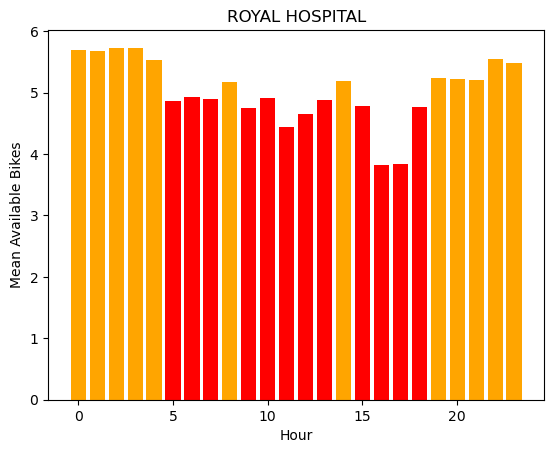

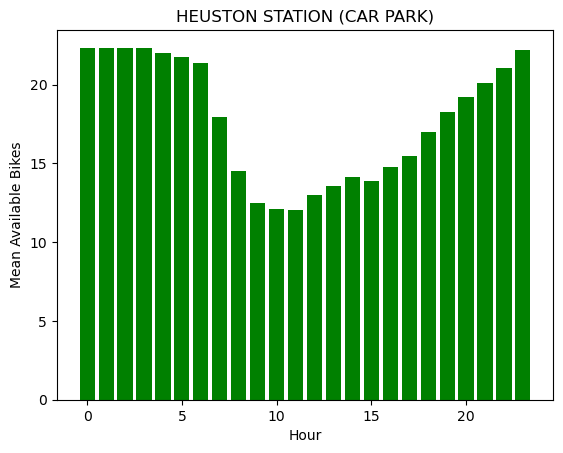

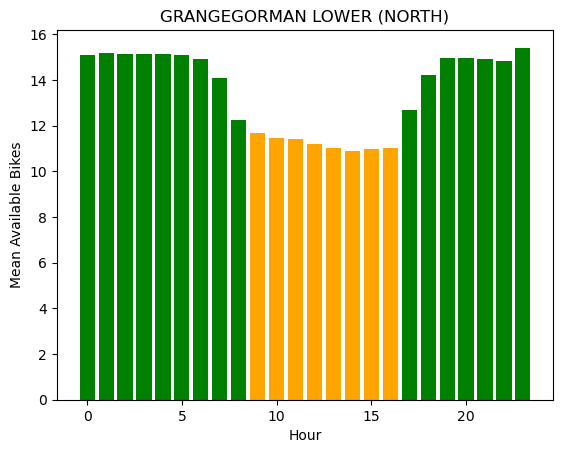

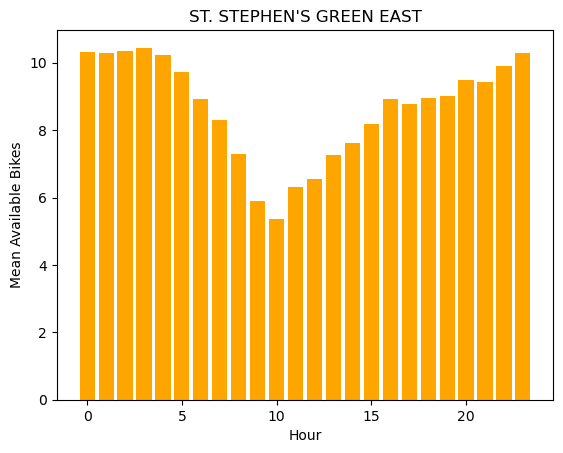

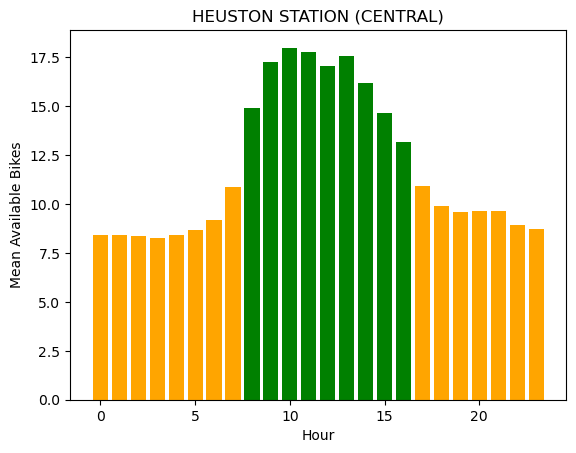

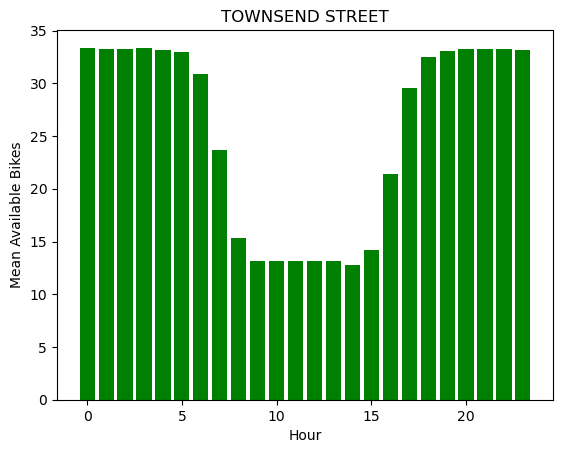

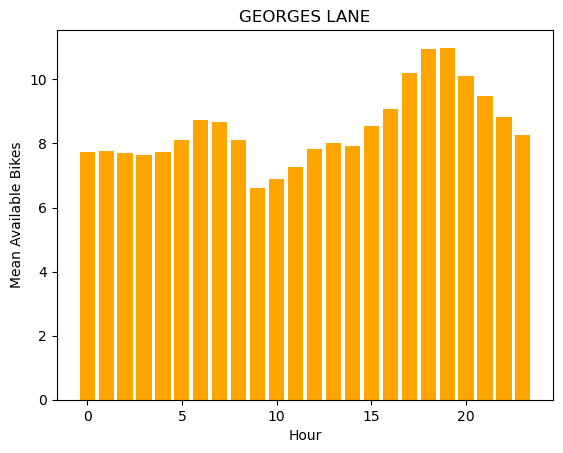

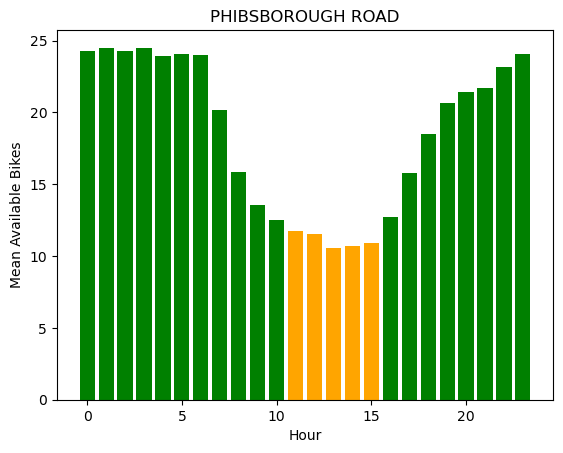

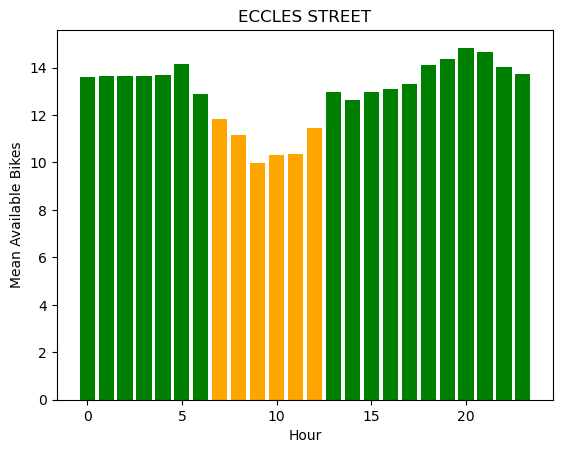

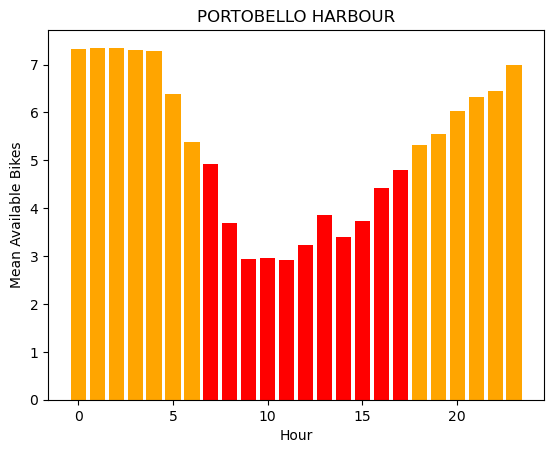

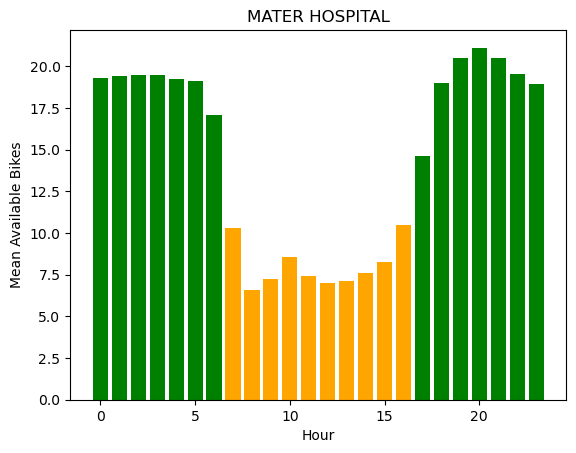

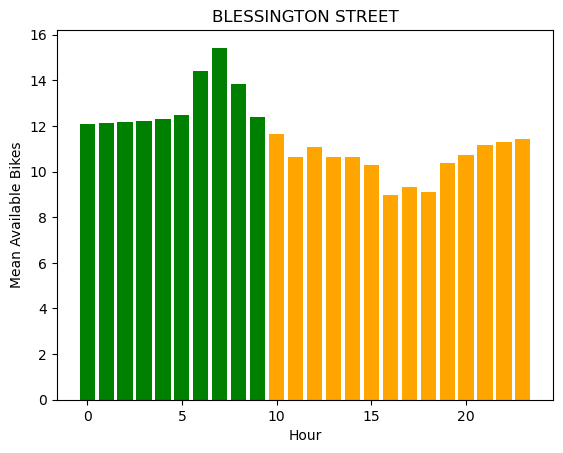

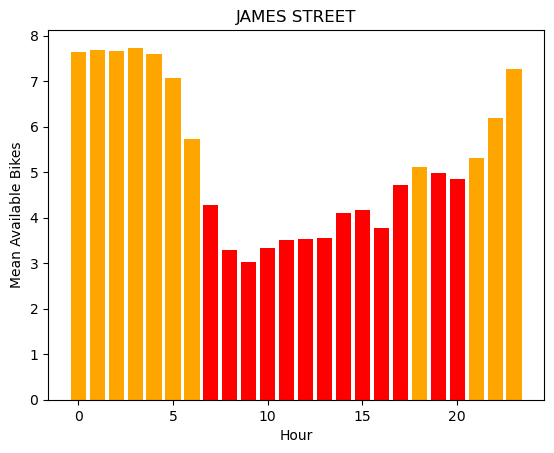

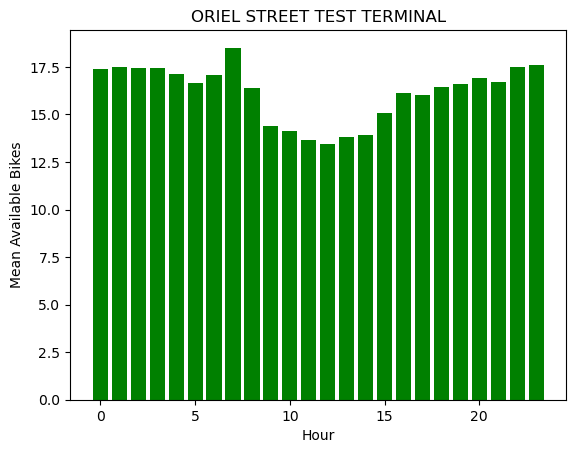

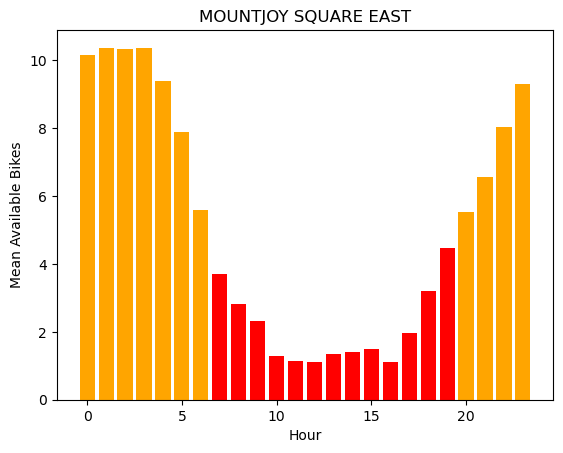

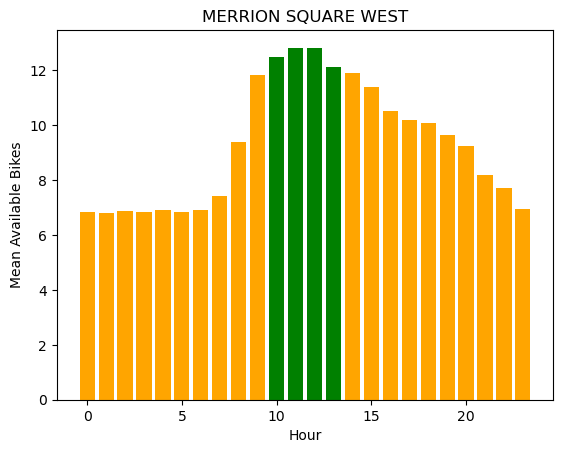

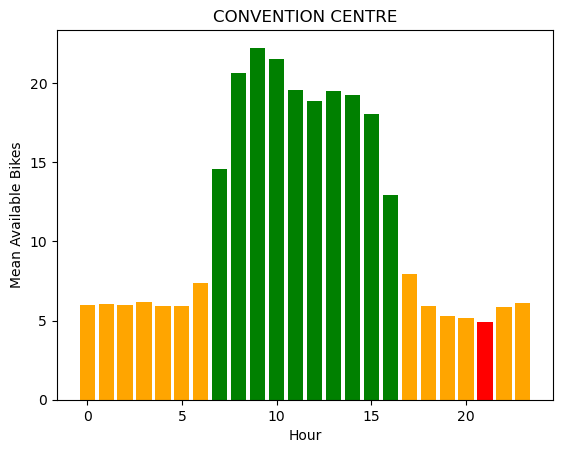

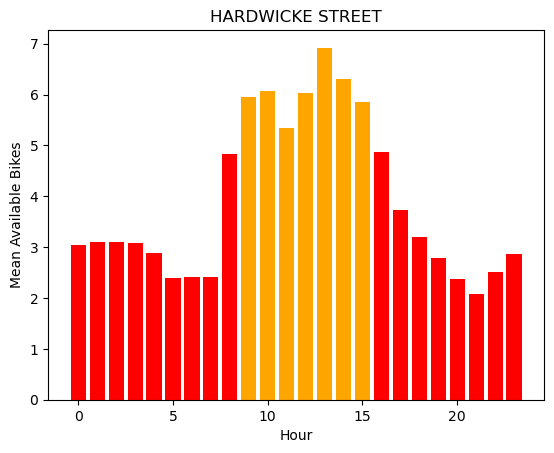

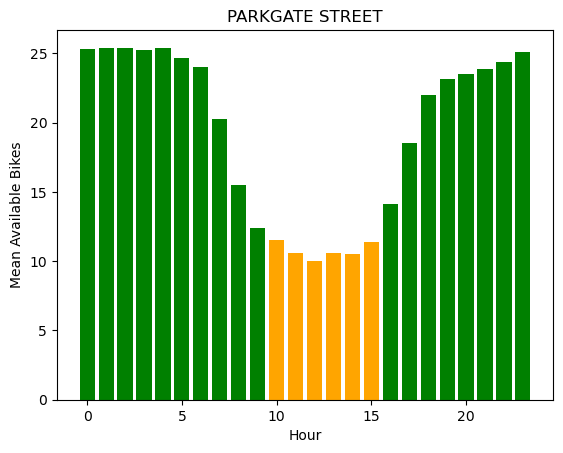

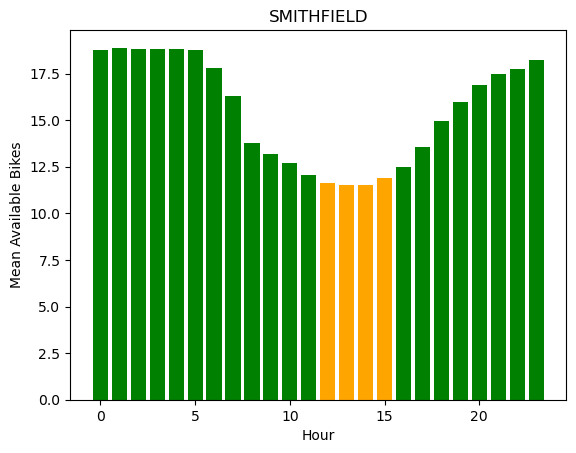

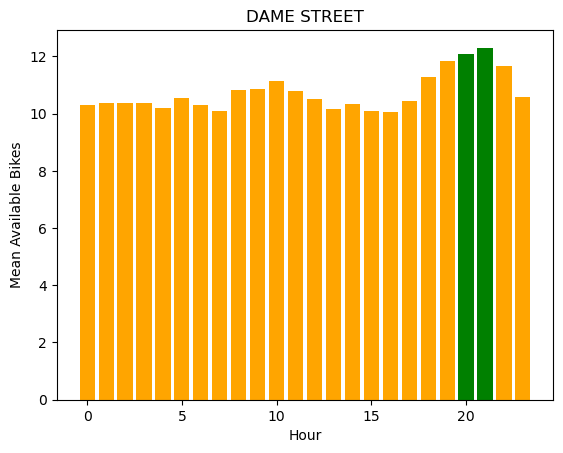

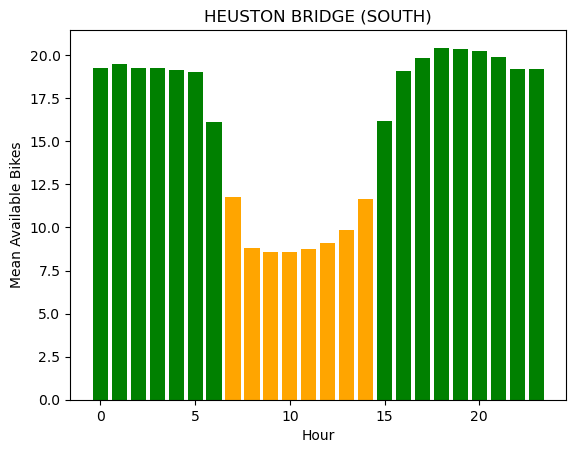

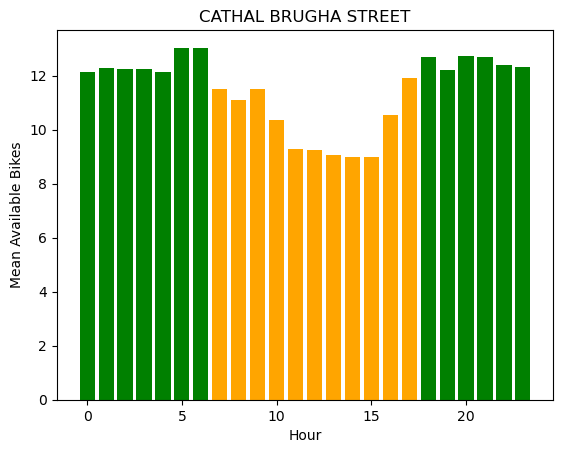

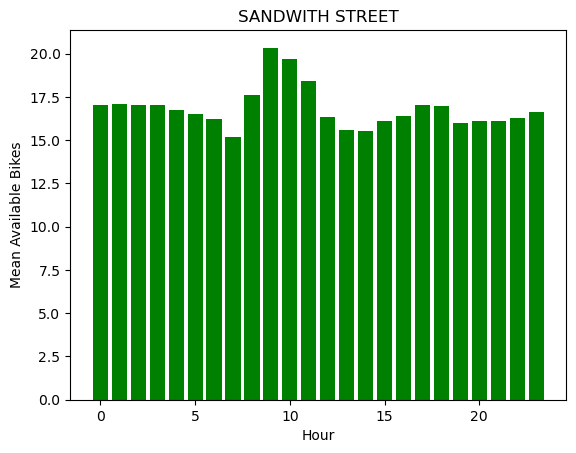

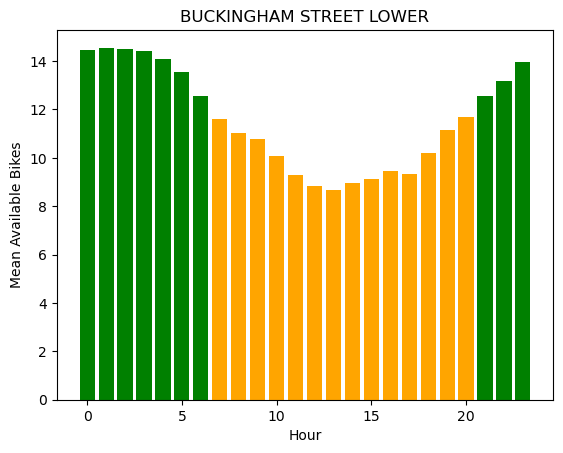

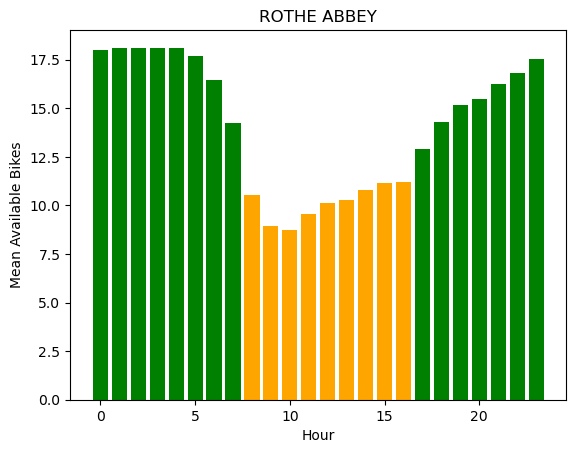

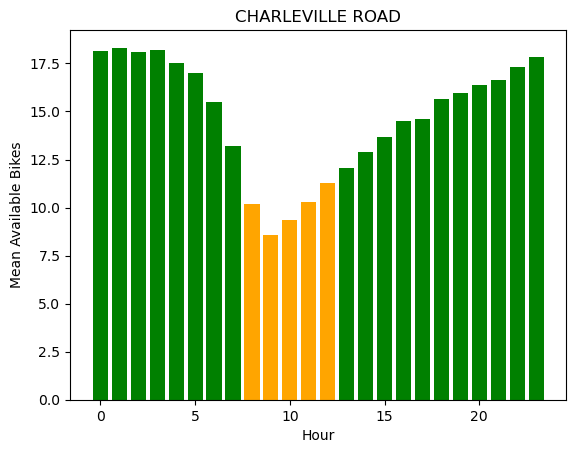

FileNotFoundError: [Errno 2] No such file or directory: "/Users/anita/Downloads/software-engineer-project-Anil-additions-2/static/plotsbikes/PRINCES STREET / O'CONNELL STREET.png"

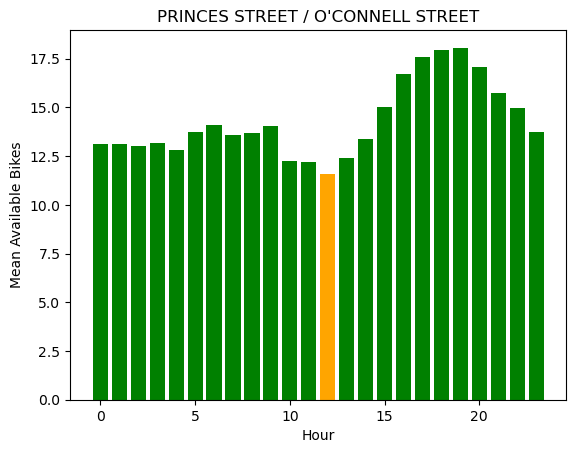

In [42]:
# plot the hour column on the x-axis and availableBikes column on the y-axis
#plt.plot(dfu['hour'], dfu['availableBikes'])
#plt.xlabel('Hour')
#plt.ylabel('Available Bikes')
#plt.show()


#line to specify the directory where you want to save the image files:

img_dir = '/Users/anita/Downloads/software-engineer-project-Anil-additions-2/static/plotsbikes'
os.makedirs(img_dir, exist_ok=True)

#storing the data to save as json
plotData ={}

# iterate over the station names and create a separate plot for each station
for i in station_names:
    # filter the DataFrame to only include data for this station
    station_df = dfa[dfa['nameStation'] == i]

    # group the data by the hour column and take the mean of the availableBikes column for each hour
    hour_groups = station_df.groupby('hour')
    mean_bikes = hour_groups['availableBikes'].mean()

    # plot the mean available bikes for each hour as a bar chart
    # define the colors based on the values
    colors = ['red' if value < 5 else 'orange' if value < 12 else 'green' for value in mean_bikes.values]

    # plot the mean available bikes for each hour as a bar chart with the assigned colors
    plt.bar(mean_bikes.index, mean_bikes.values, color=colors)
    
    plt.xlabel('Hour')
    plt.ylabel('Mean Available Bikes')
    plt.title(i)
    
    # save the plot as a file with the name of the station
    plt.savefig(os.path.join(img_dir, f"{i}.png"))
    
    #If you save after showing, it saves an empty plot...
    plt.show()
    
    # close the figure to prevent it from being reused for the next iteration
    plt.close()
    
    #store the mean_bikes data in the data dictionary
    plotData[i] = mean_bikes.to_dict()


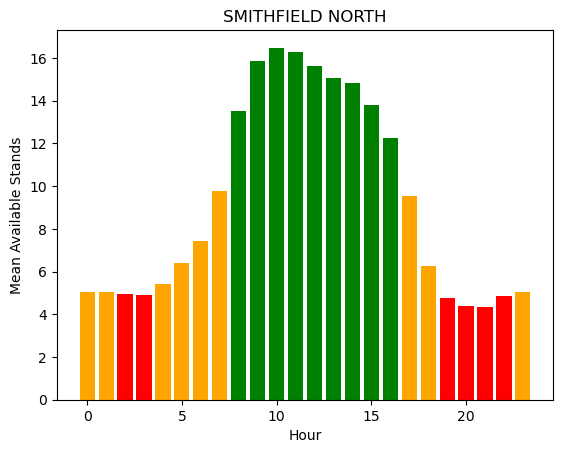

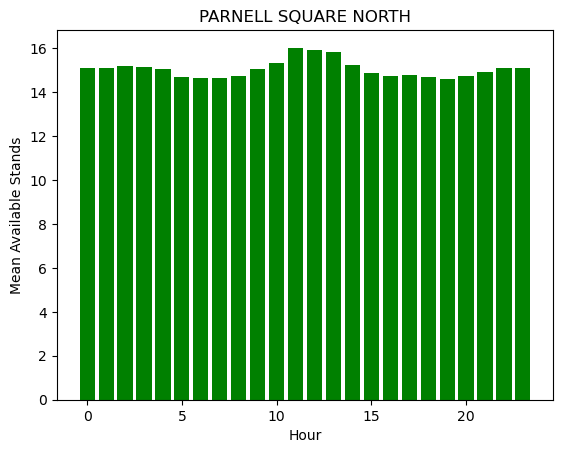

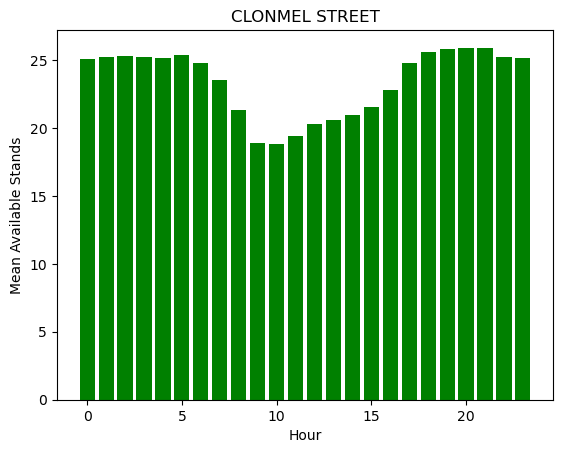

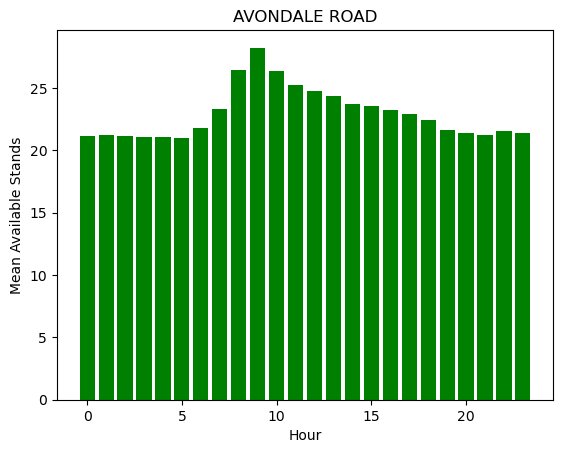

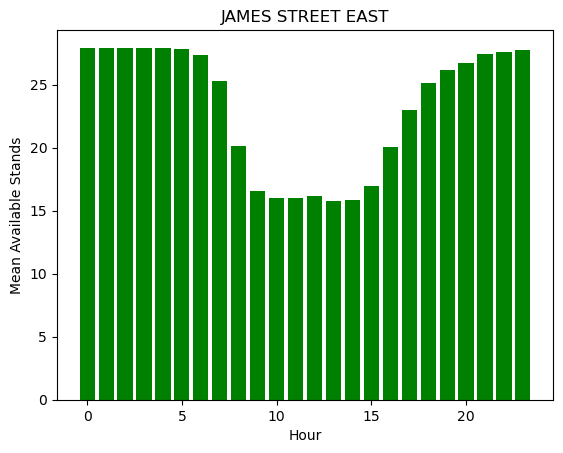

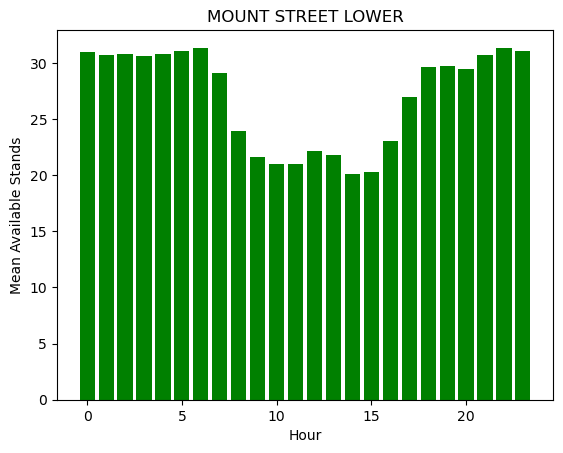

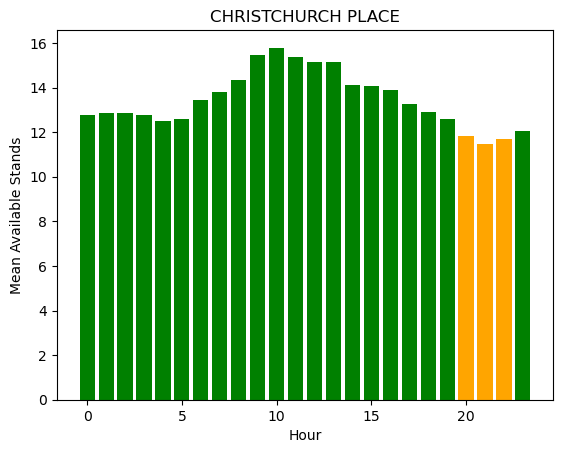

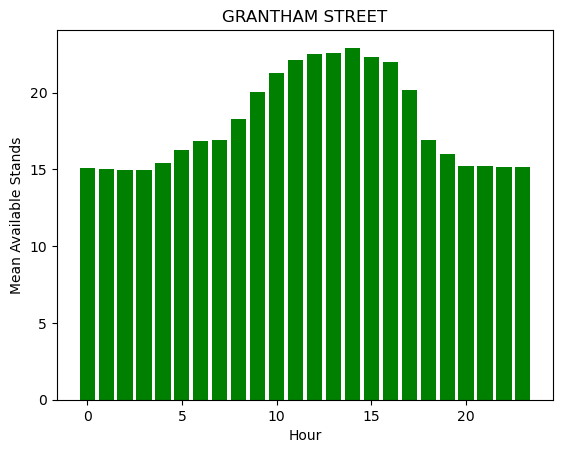

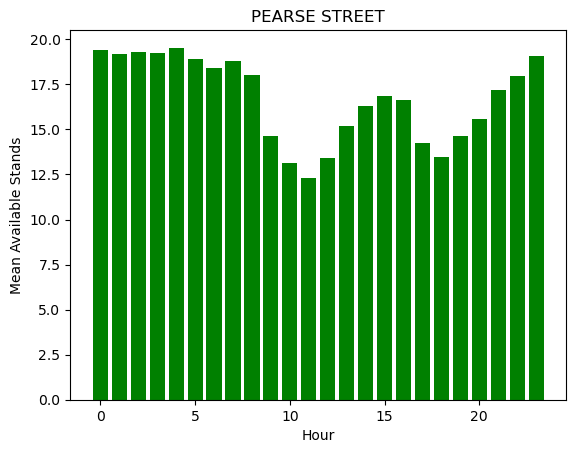

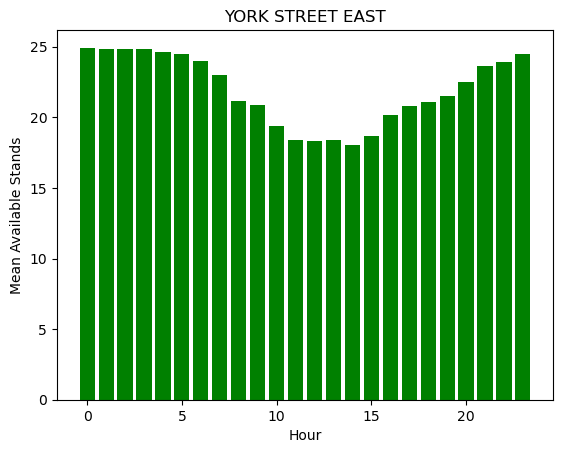

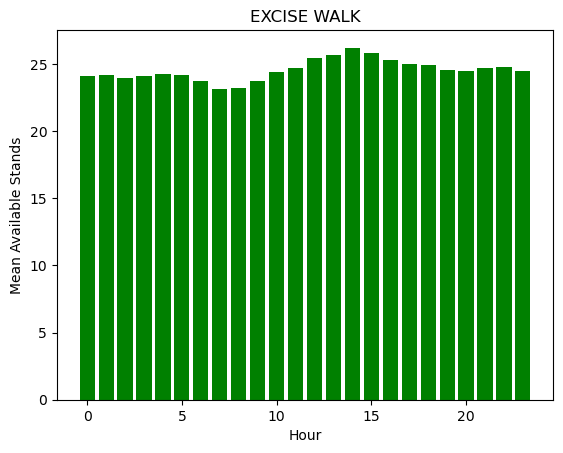

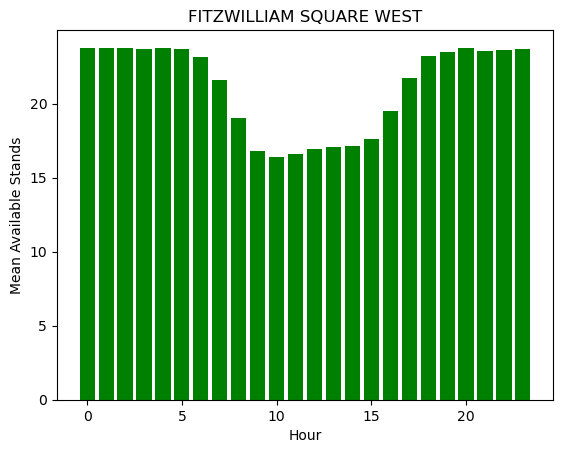

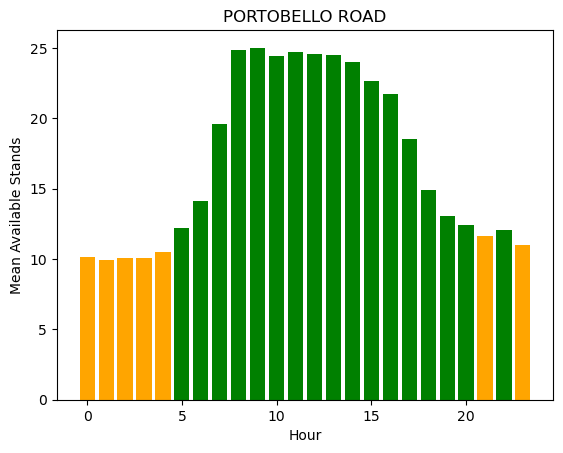

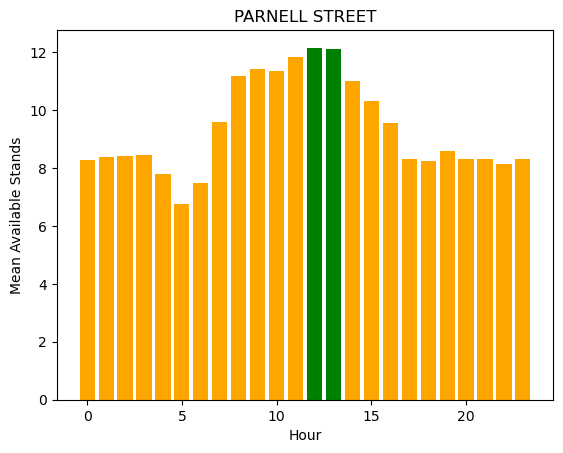

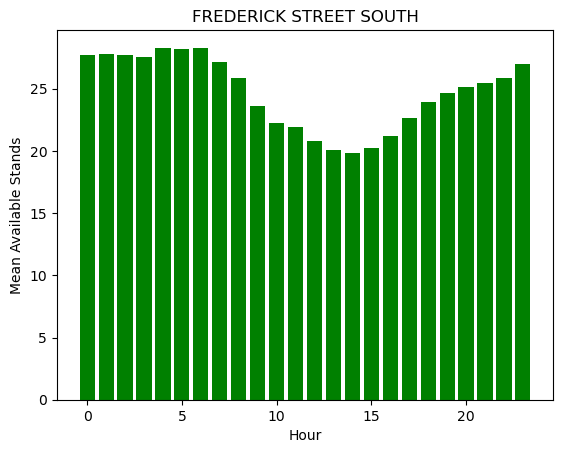

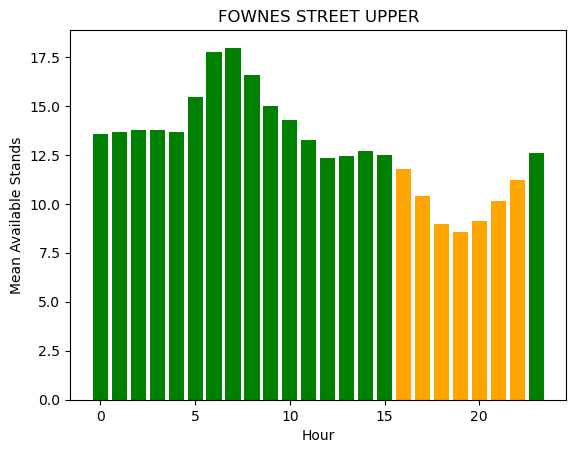

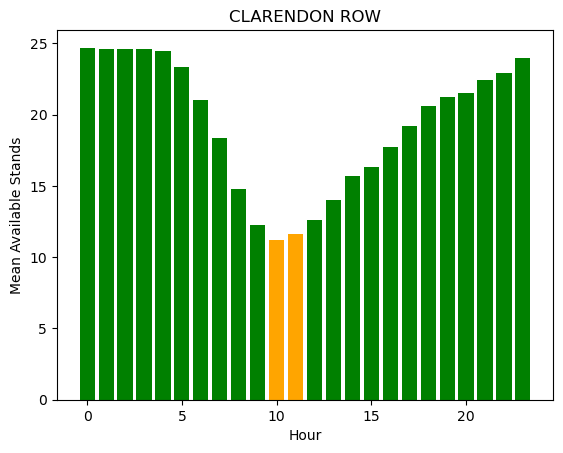

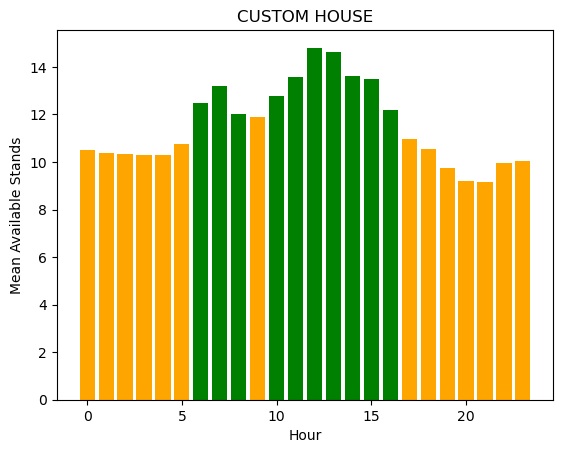

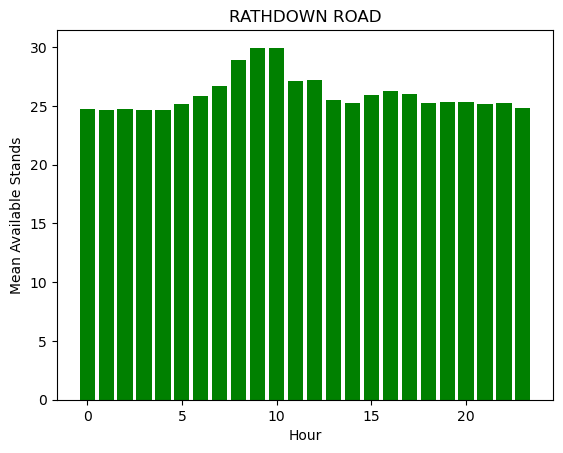

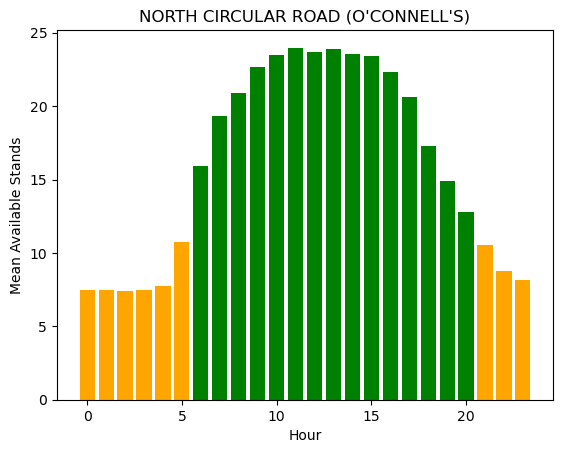

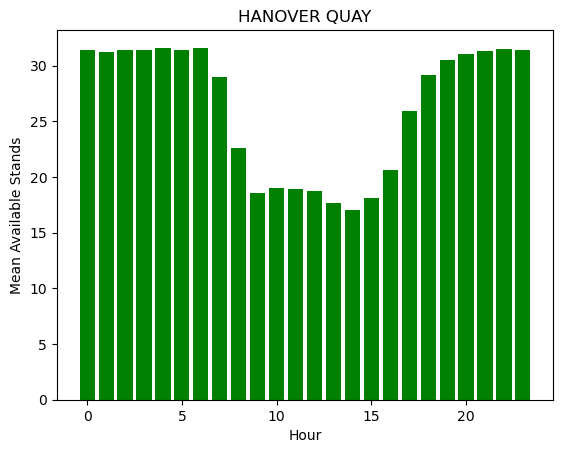

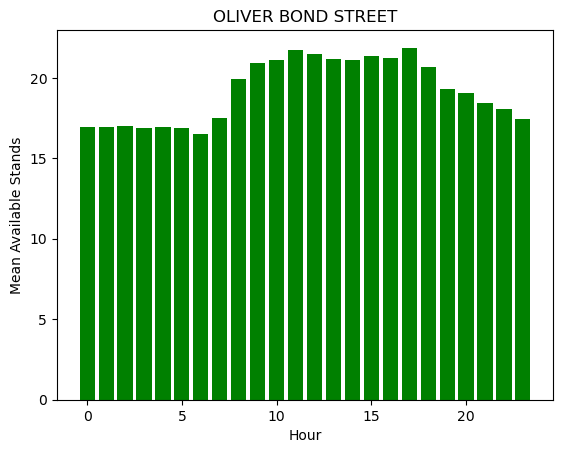

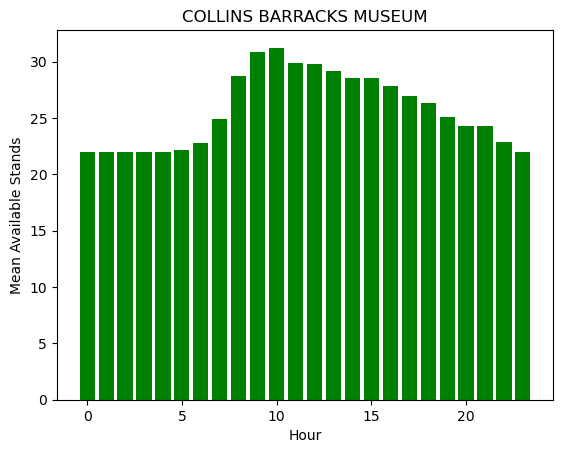

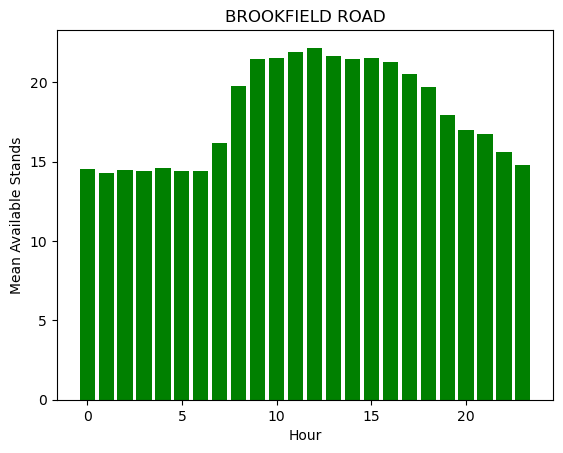

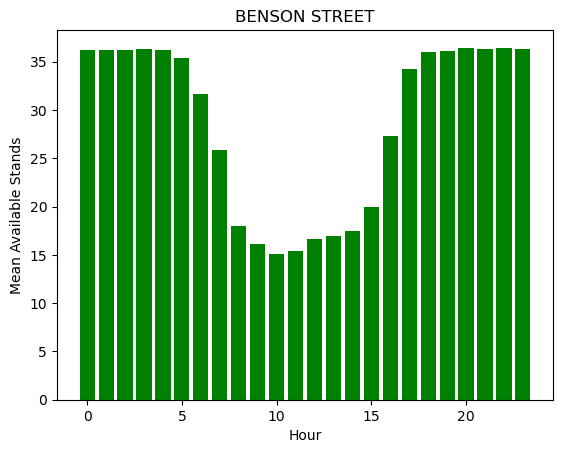

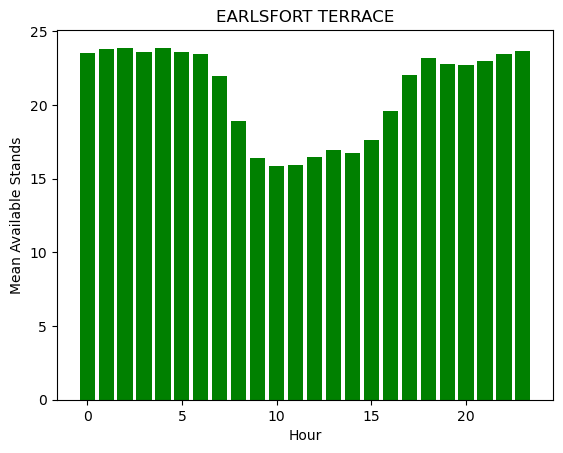

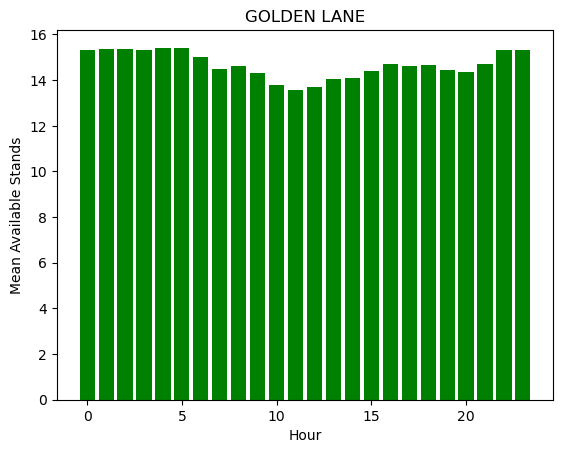

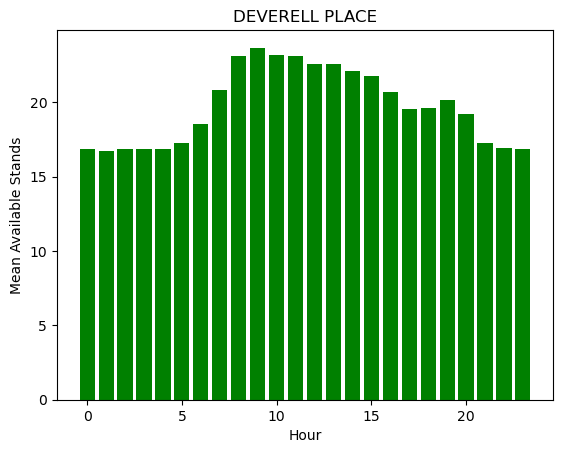

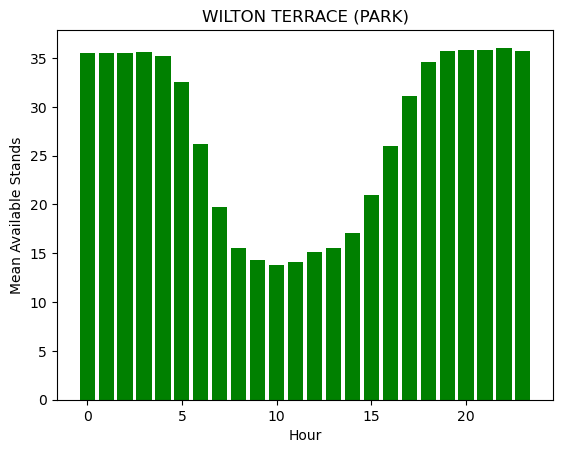

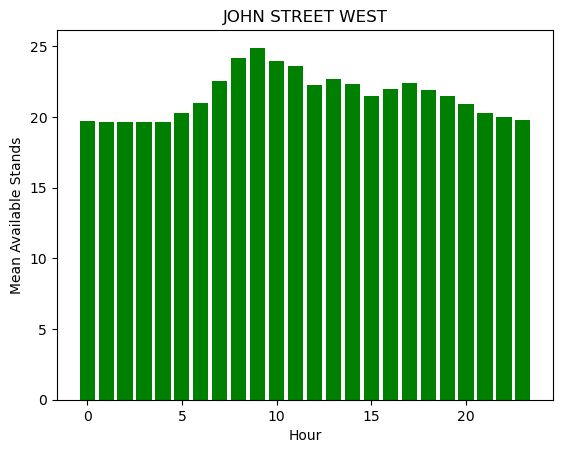

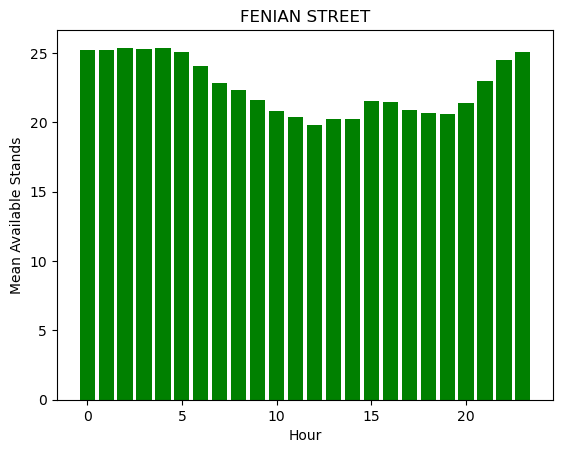

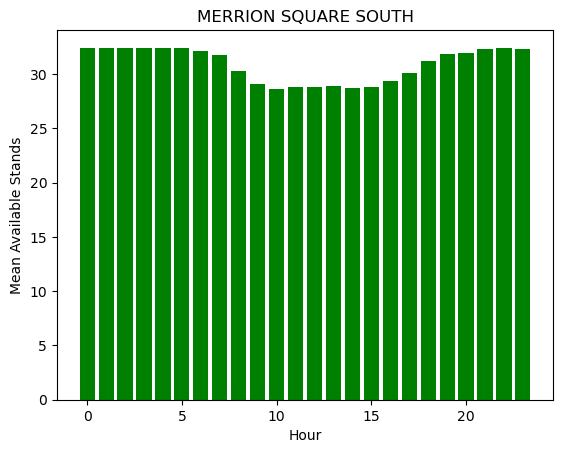

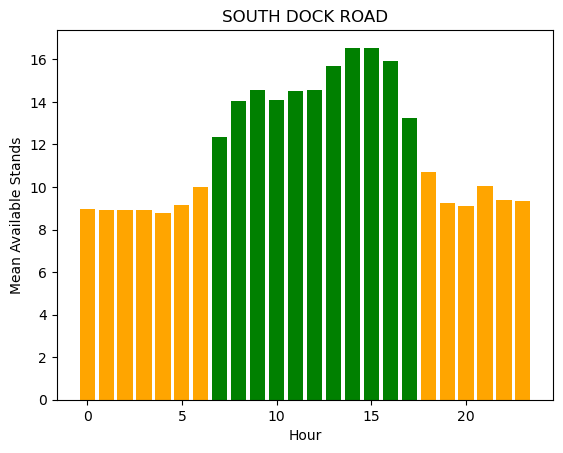

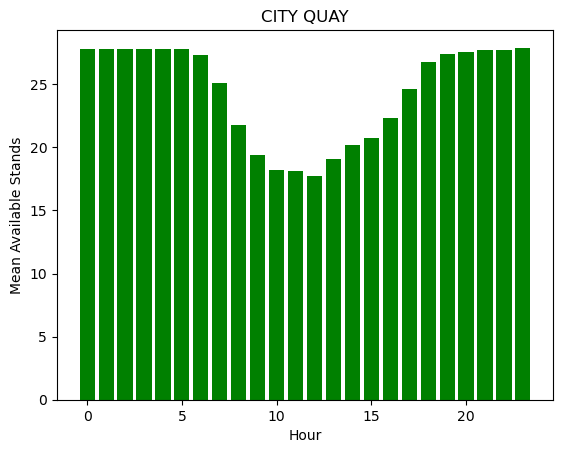

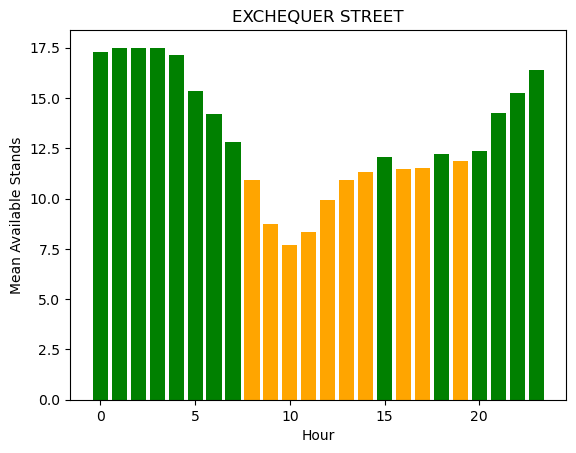

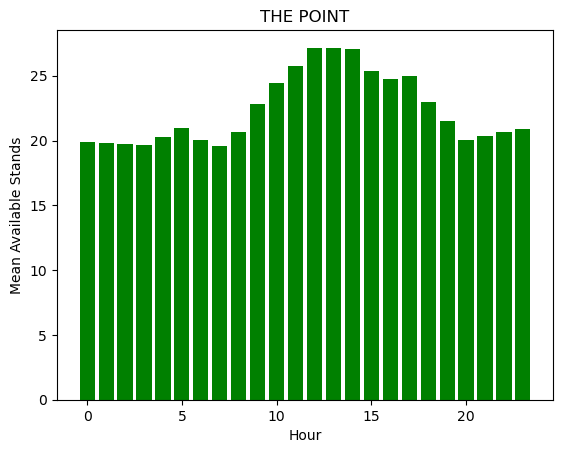

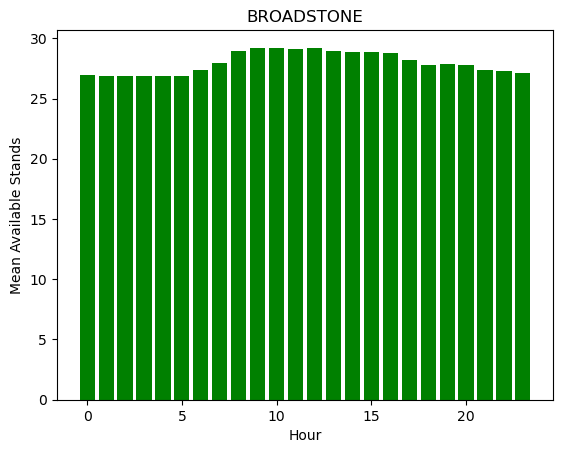

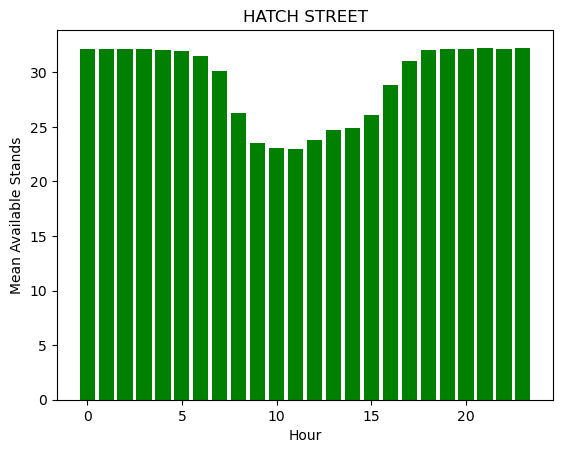

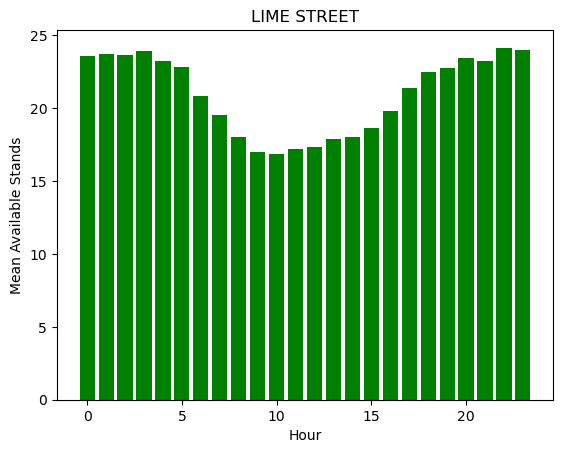

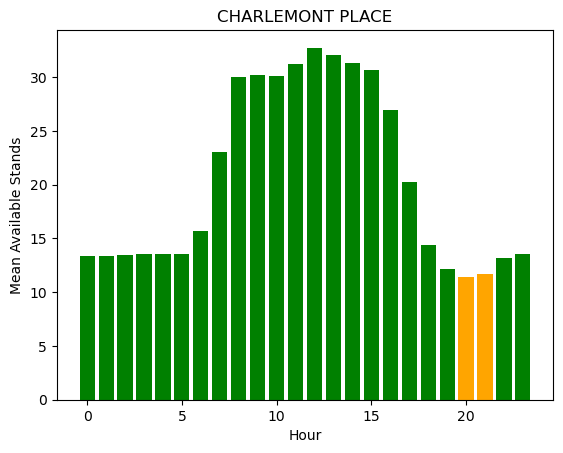

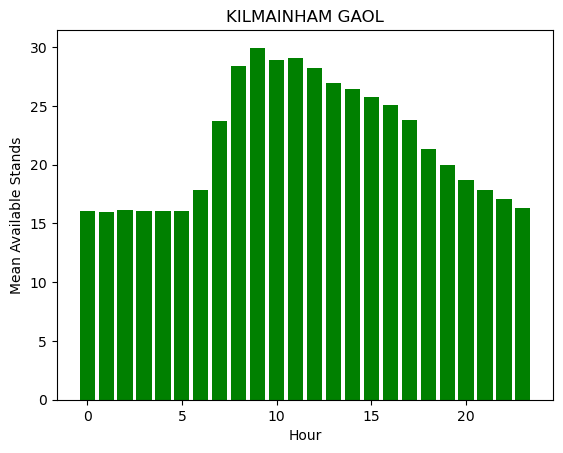

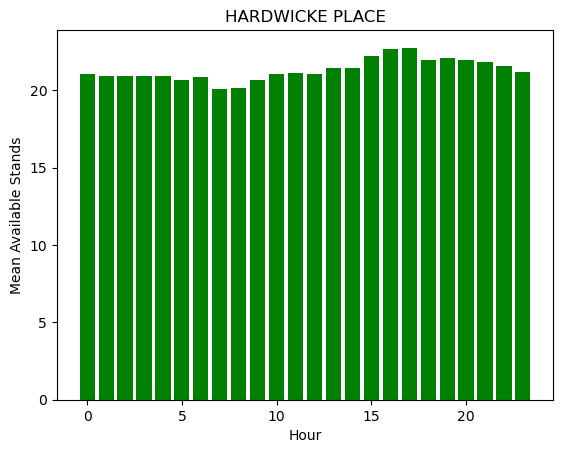

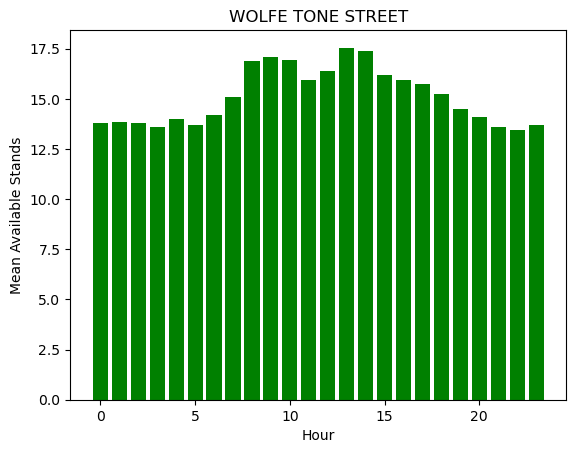

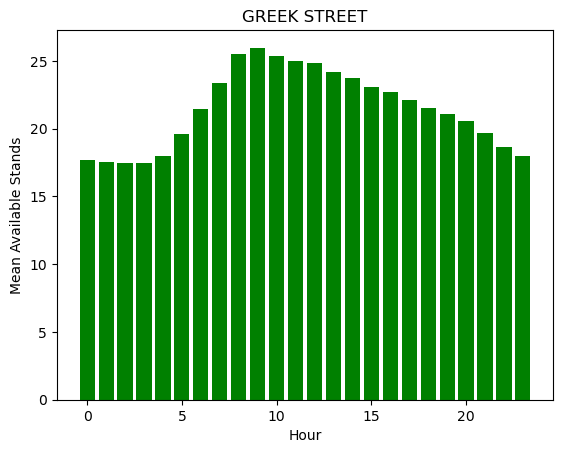

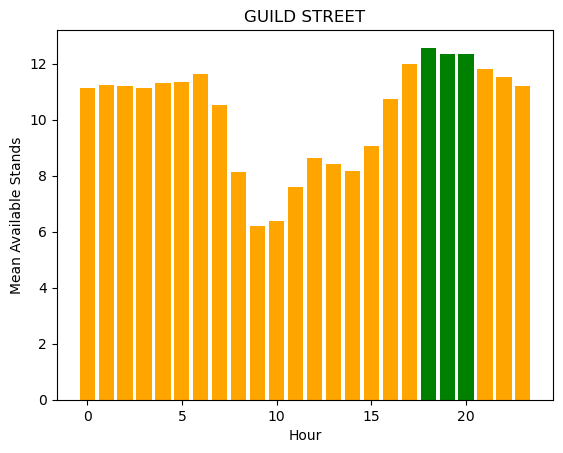

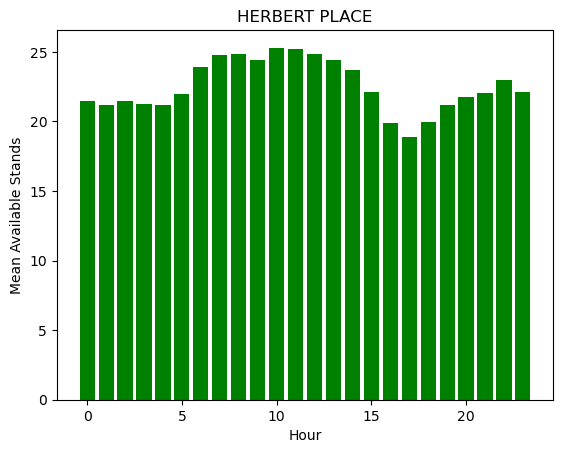

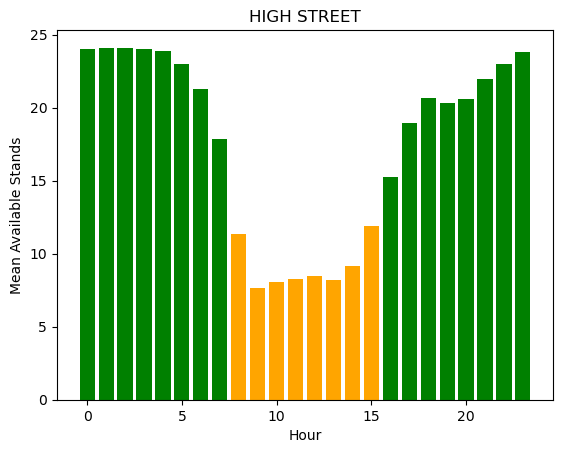

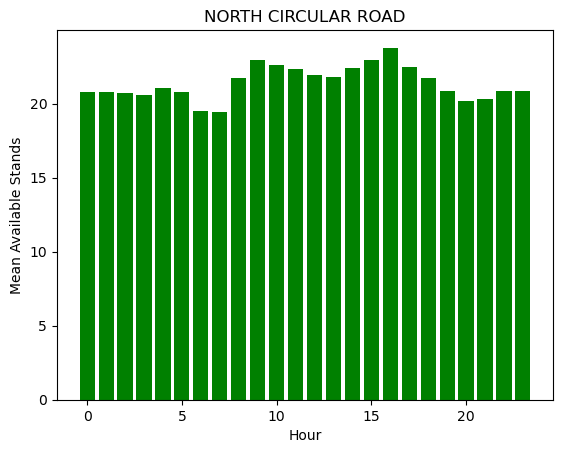

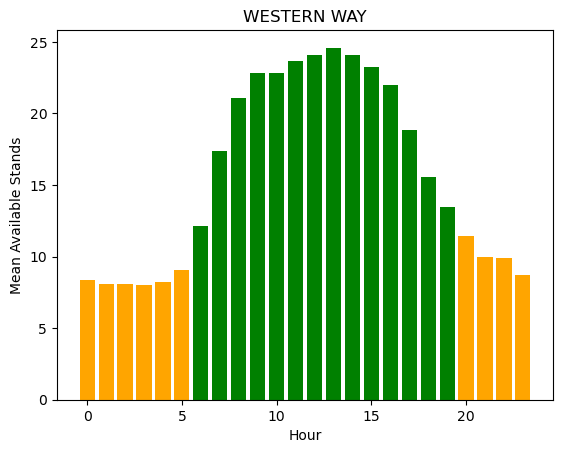

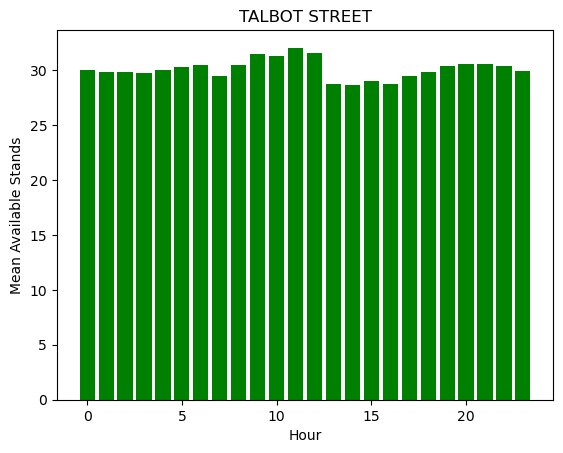

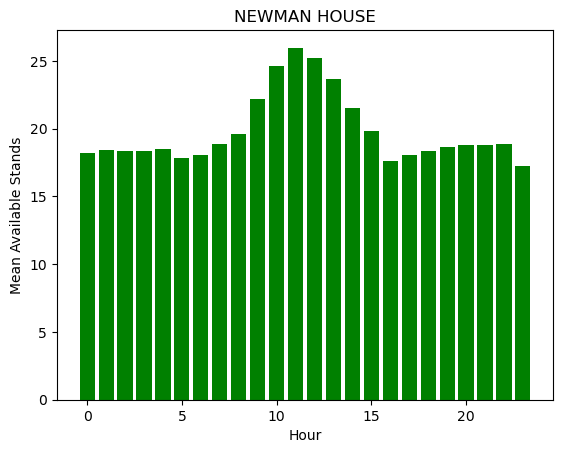

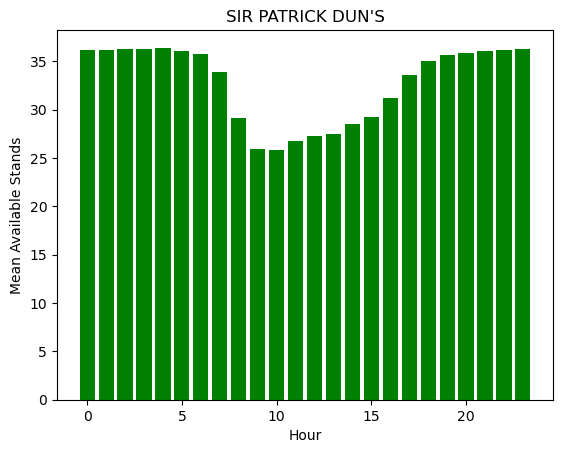

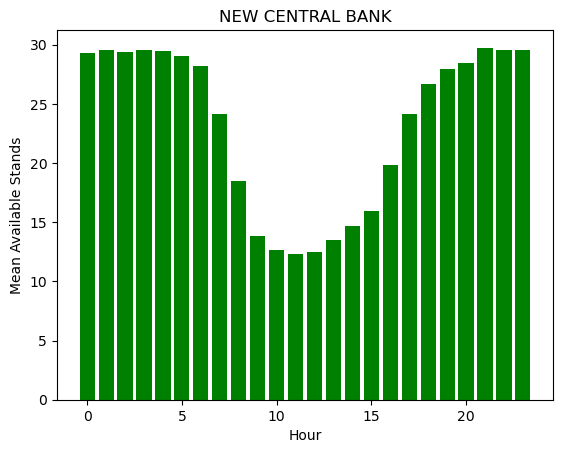

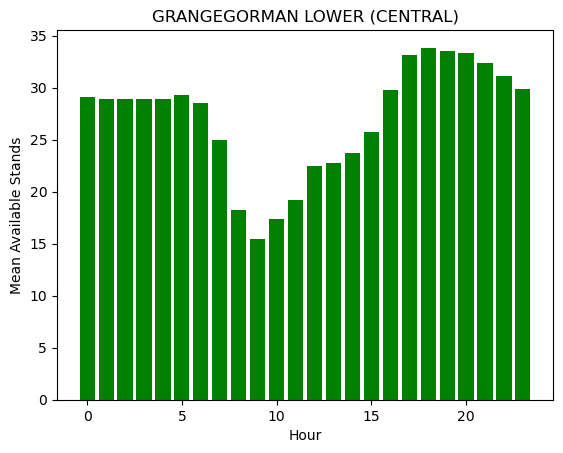

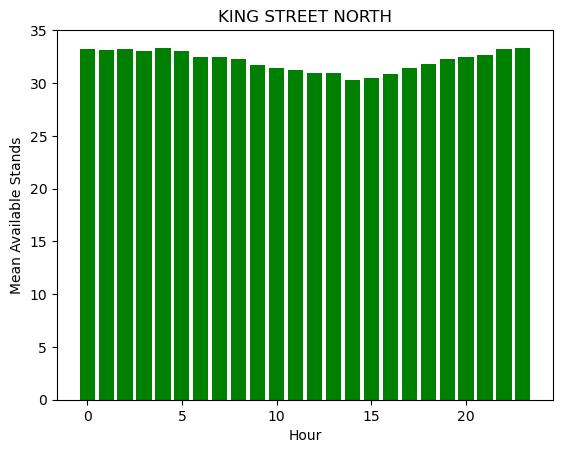

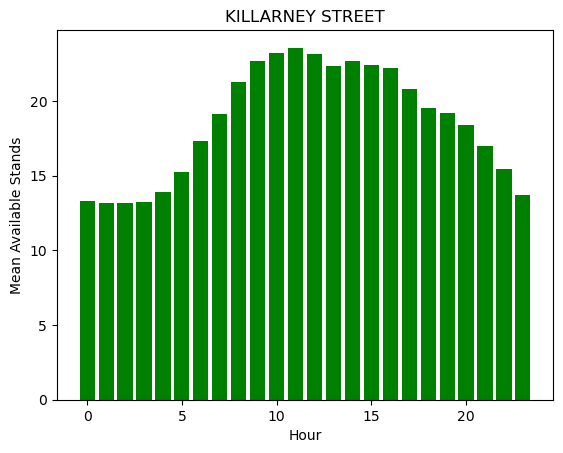

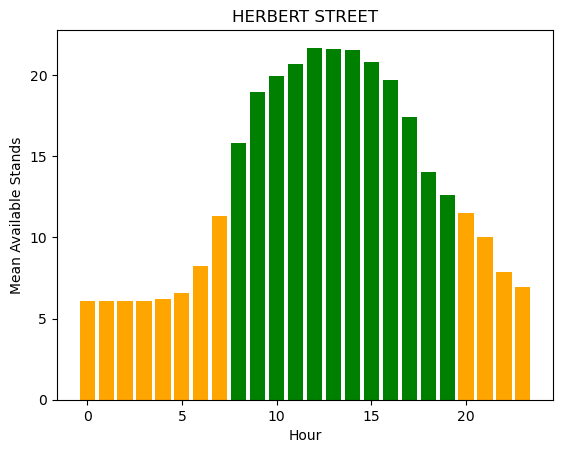

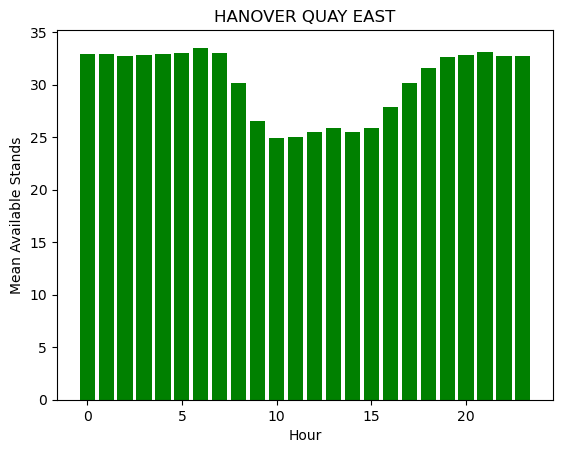

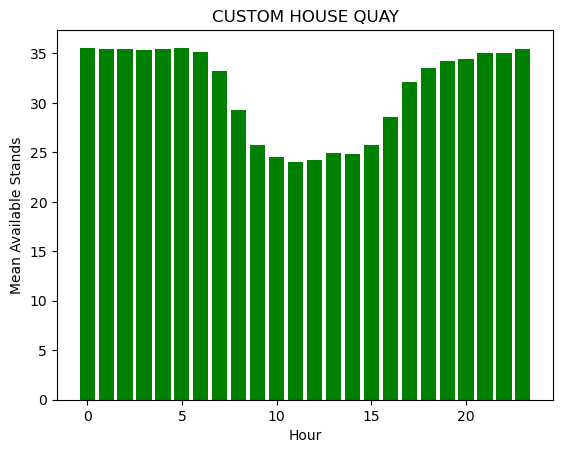

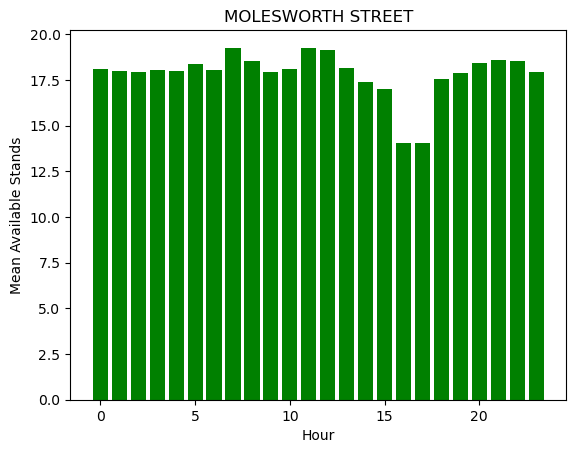

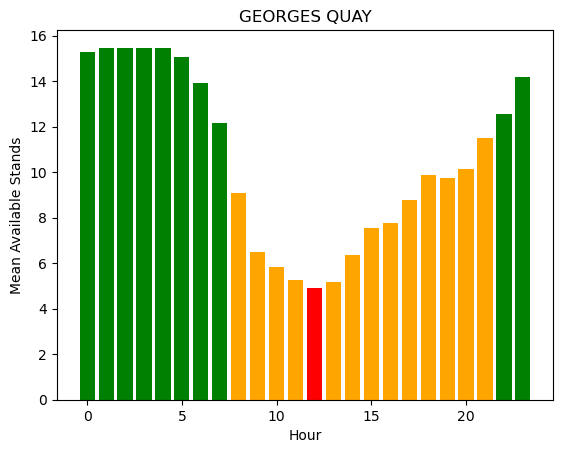

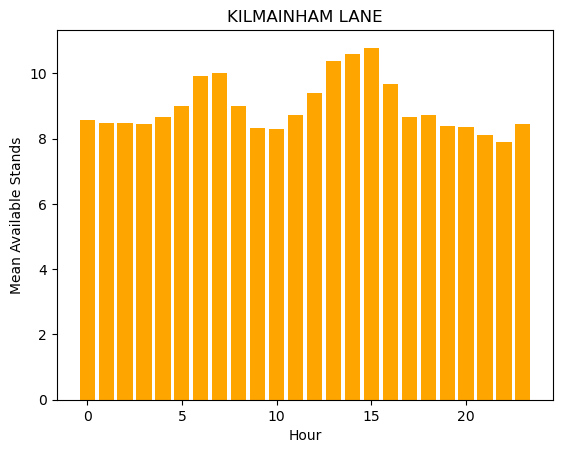

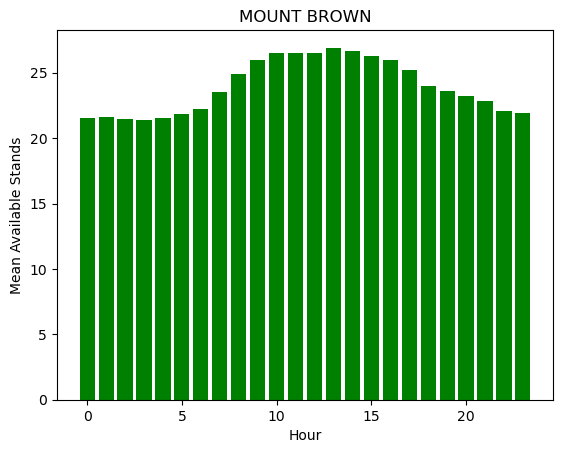

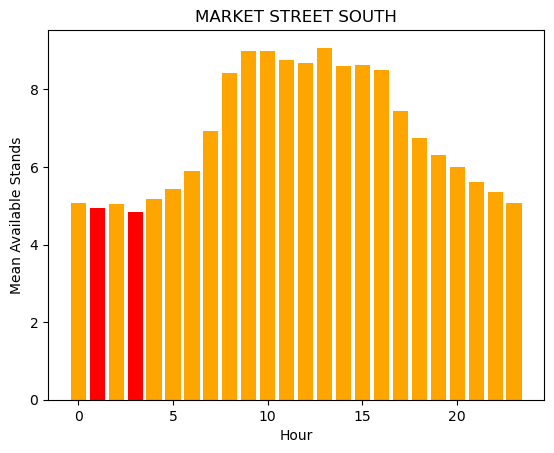

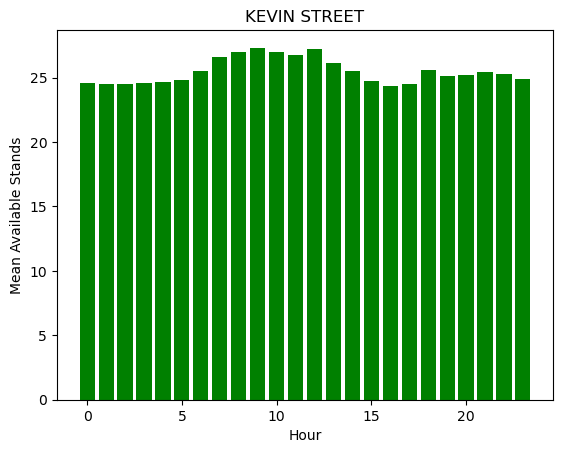

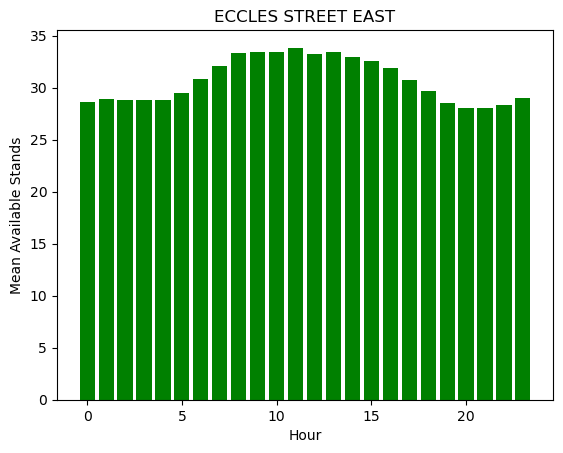

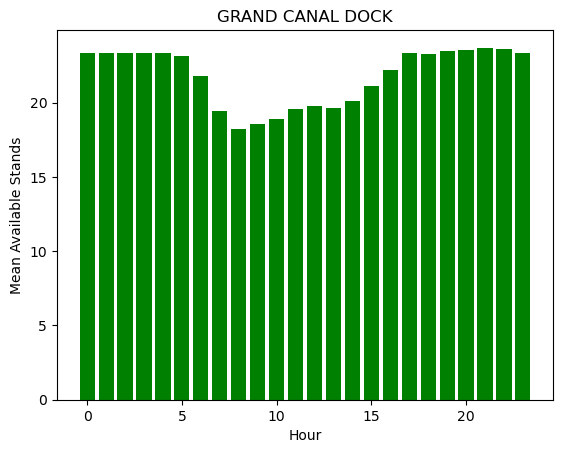

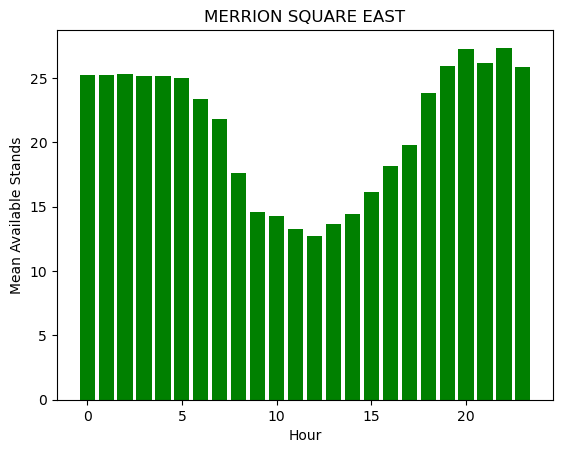

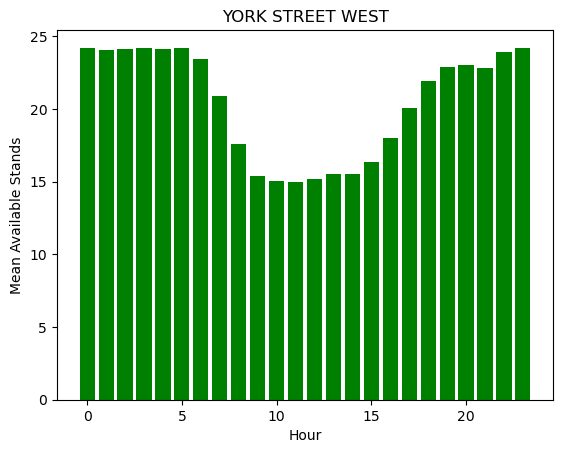

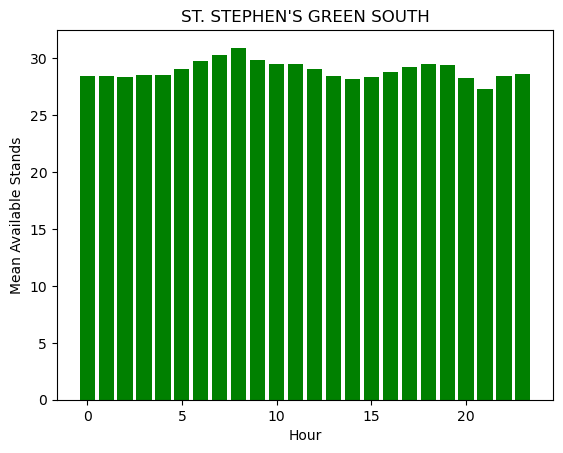

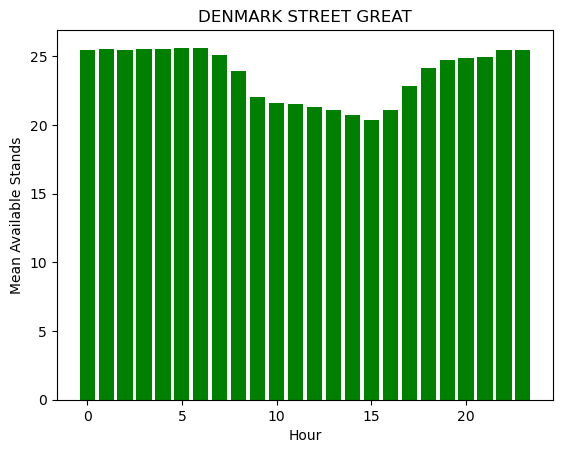

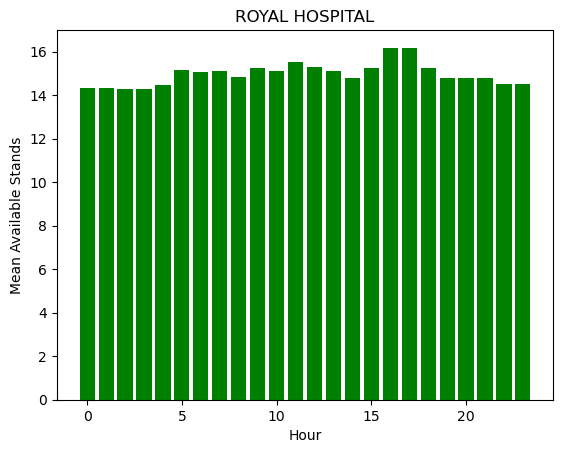

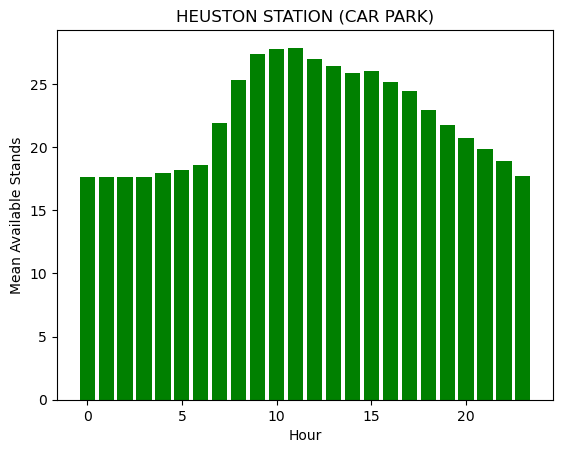

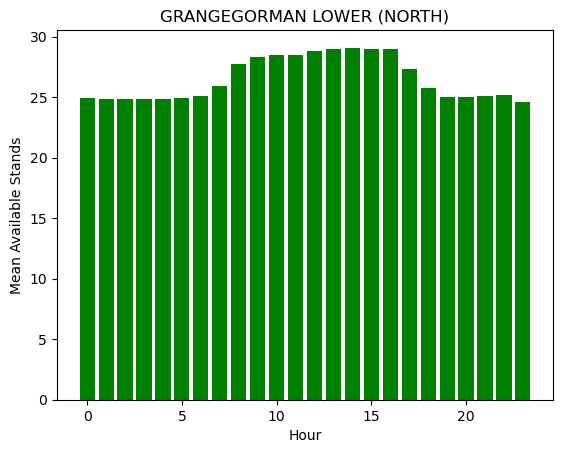

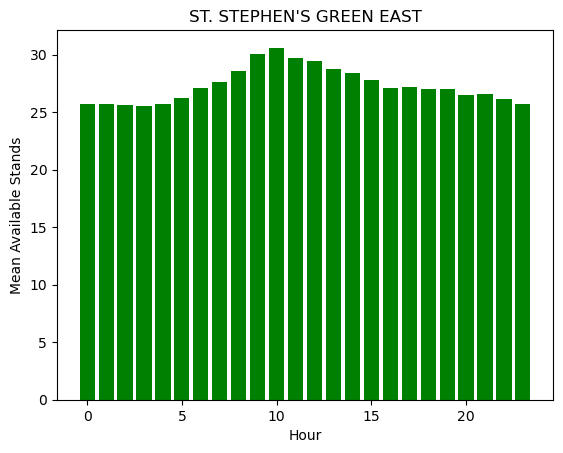

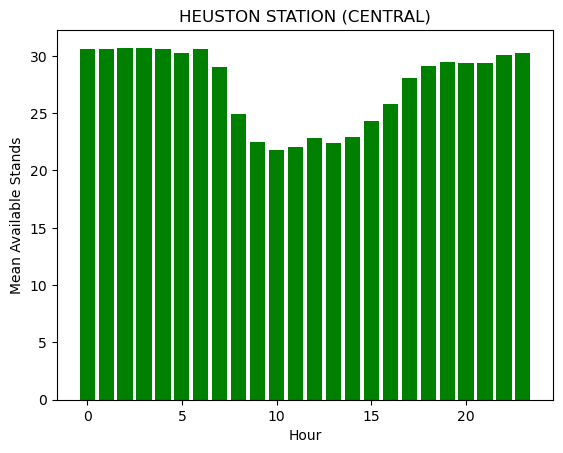

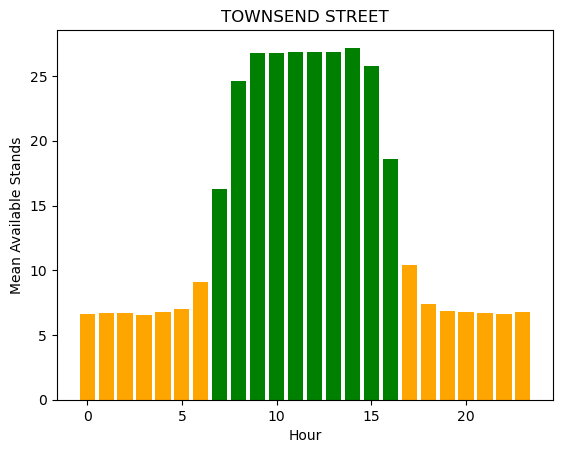

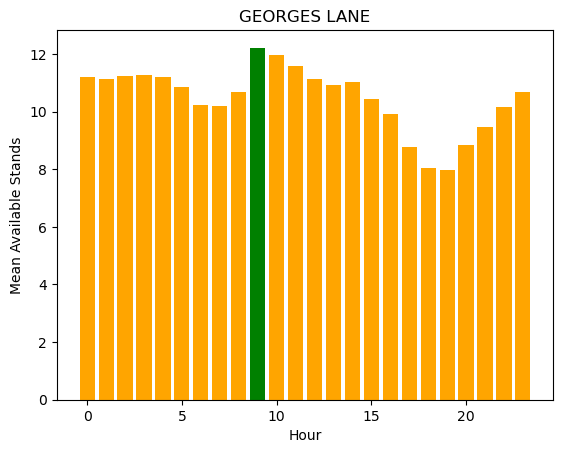

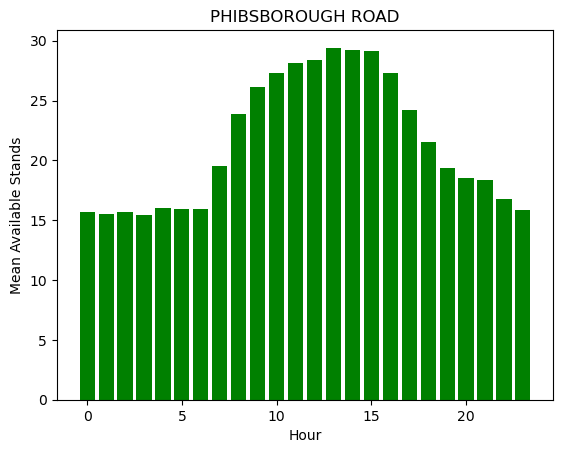

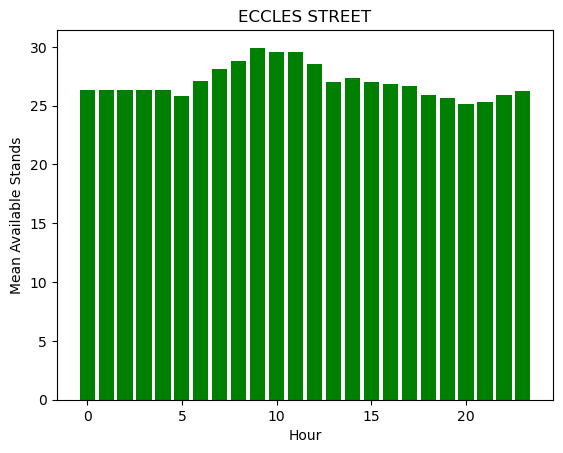

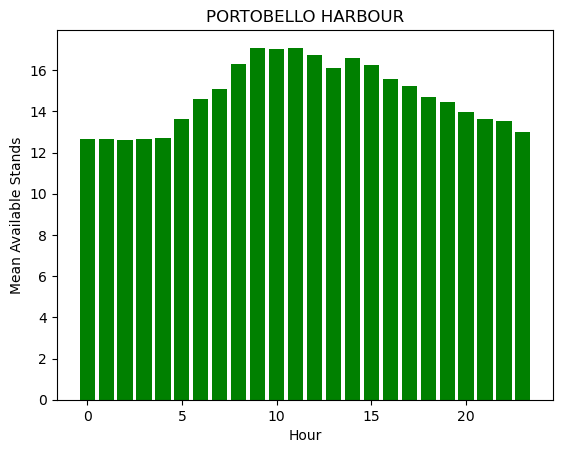

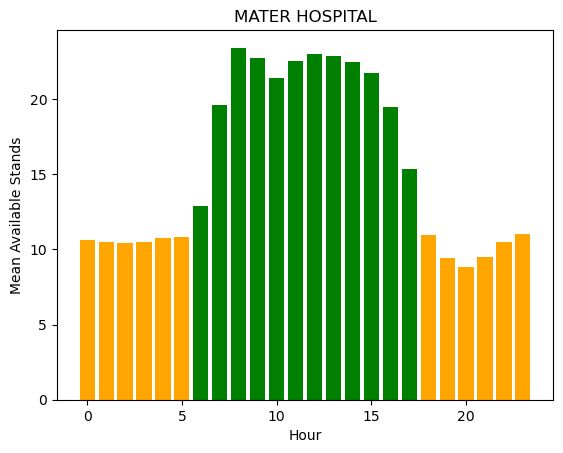

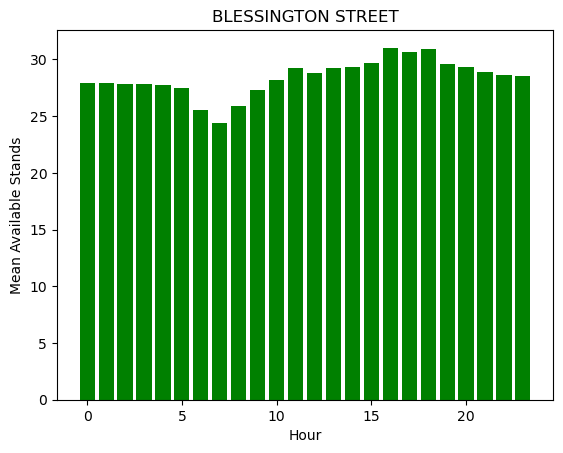

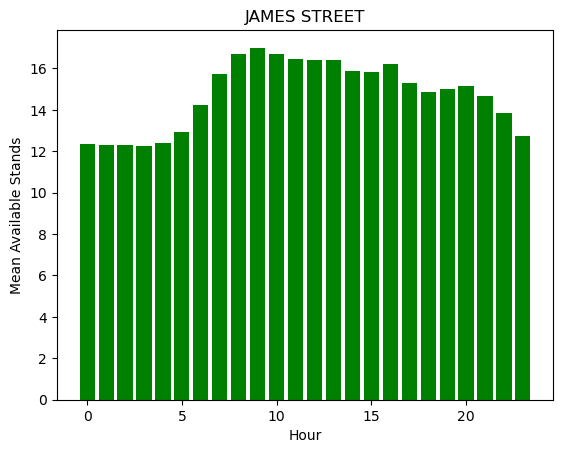

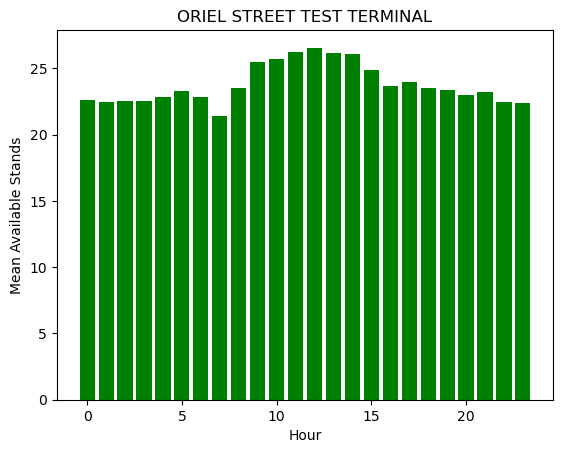

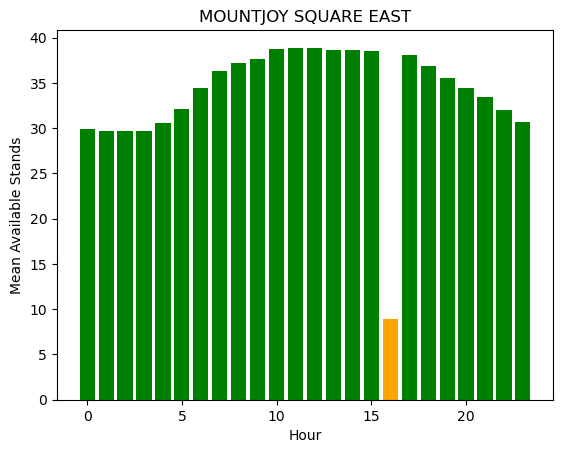

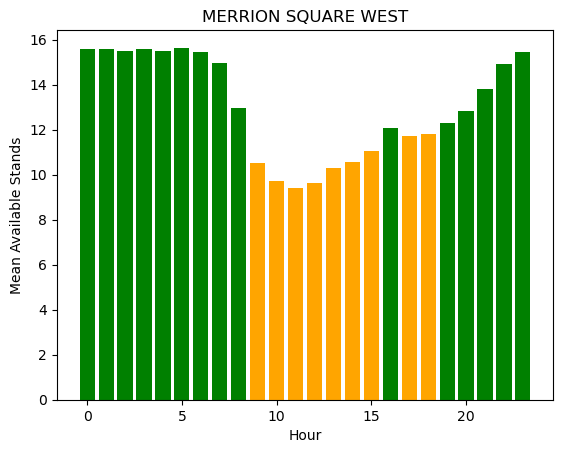

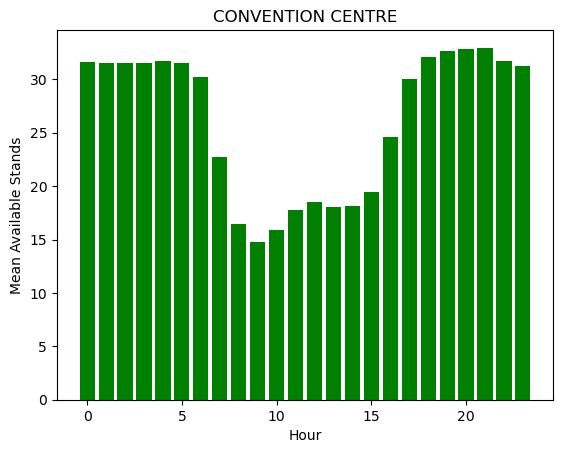

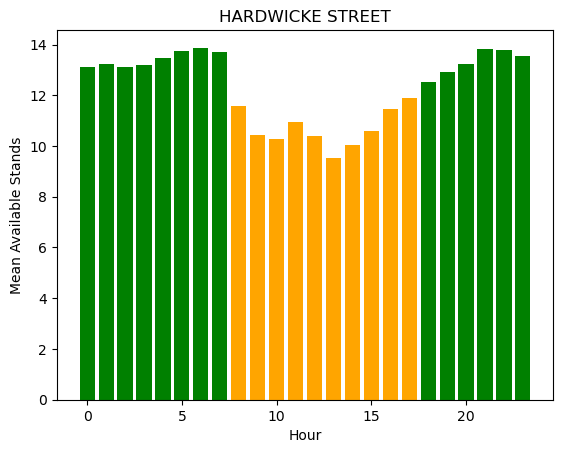

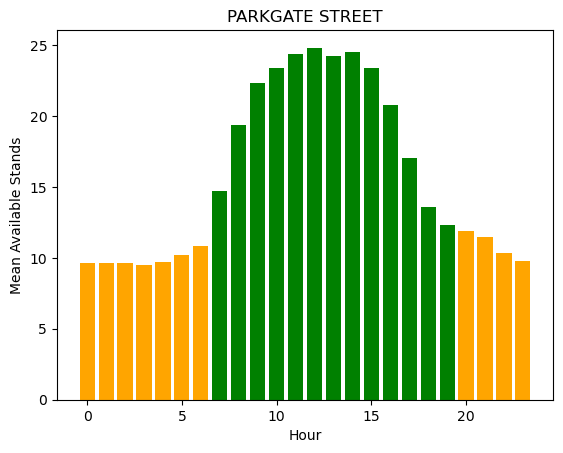

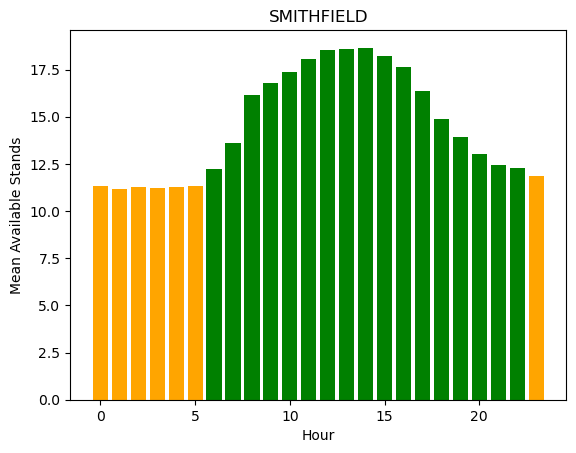

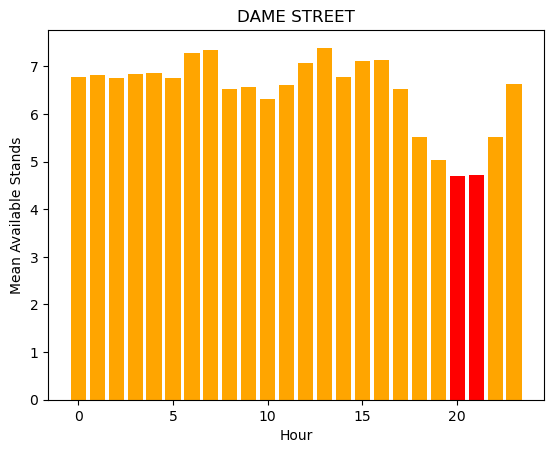

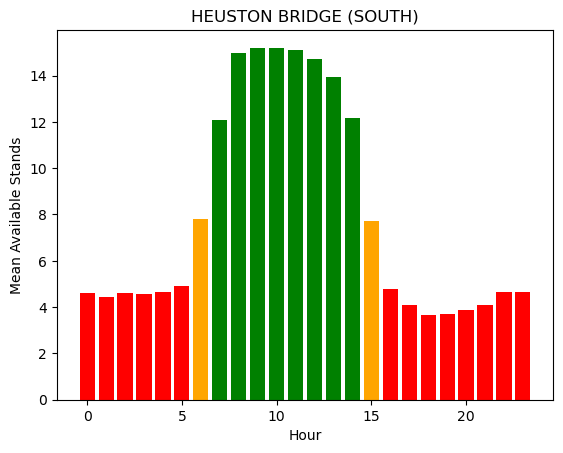

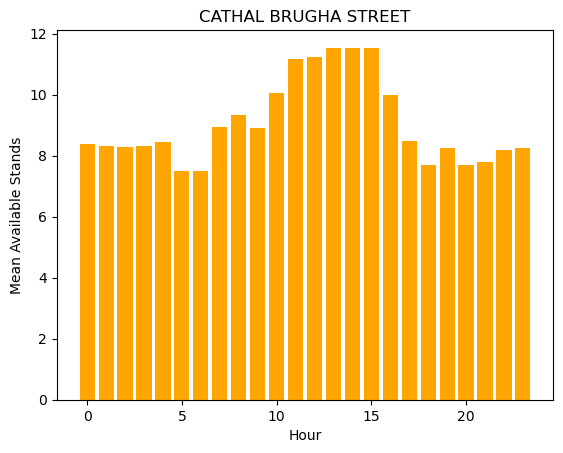

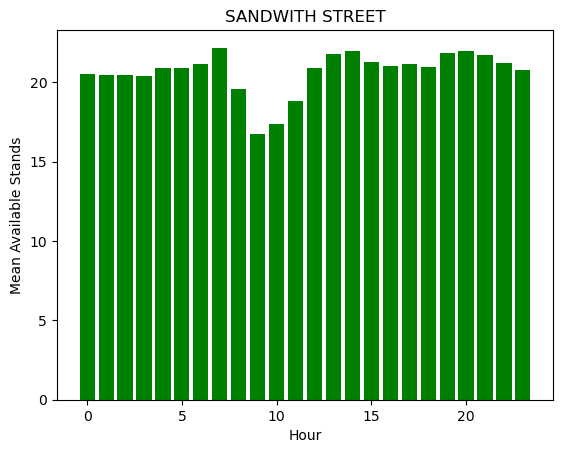

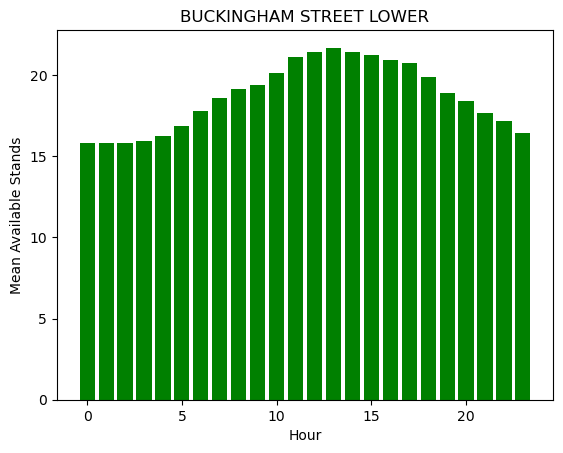

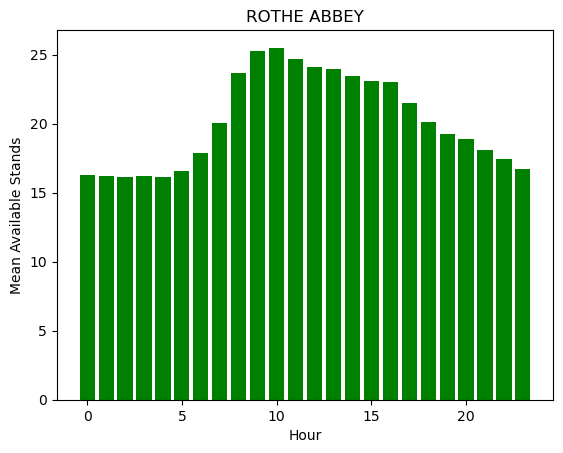

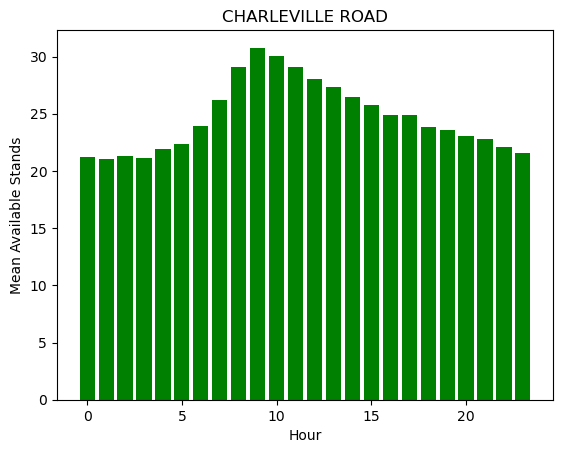

FileNotFoundError: [Errno 2] No such file or directory: "/Users/anita/Downloads/software-engineer-project-Anil-additions-2/static/plotsstands/PRINCES STREET / O'CONNELL STREET.png"

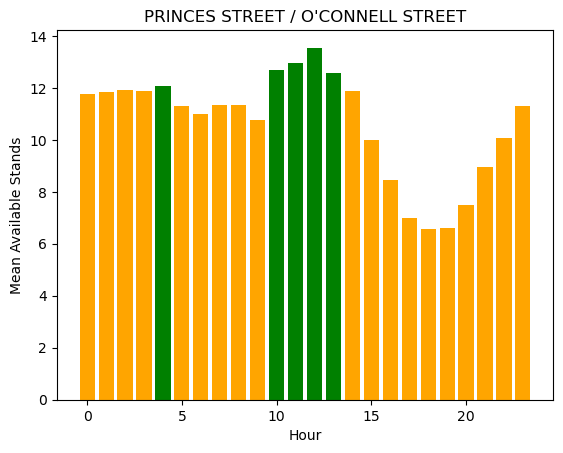

In [44]:
#line to specify the directory where you want to save the image files:

img_dir = '/Users/anita/Downloads/software-engineer-project-Anil-additions-2/static/plotsstands'
os.makedirs(img_dir, exist_ok=True)

#storing the data to save as json
plotData ={}

# iterate over the station names and create a separate plot for each station
for i in station_names:
    # filter the DataFrame to only include data for this station
    station_df = dfa[dfa['nameStation'] == i]

    # group the data by the hour column and take the mean of the availableBikes column for each hour
    hour_groups = station_df.groupby('hour')
    mean_bikes = hour_groups['availableBikeStands'].mean()

    # plot the mean available bikes for each hour as a bar chart
    # define the colors based on the values
    colors = ['red' if value < 5 else 'orange' if value < 12 else 'green' for value in mean_bikes.values]

    # plot the mean available bikes for each hour as a bar chart with the assigned colors
    plt.bar(mean_bikes.index, mean_bikes.values, color=colors)
    
    plt.xlabel('Hour')
    plt.ylabel('Mean Available Stands')
    plt.title(i)
    
    # save the plot as a file with the name of the station
    plt.savefig(os.path.join(img_dir, f"{i}.png"))
    
    #If you save after showing, it saves an empty plot...
    plt.show()
    
    # close the figure to prevent it from being reused for the next iteration
    plt.close()
    
    #store the mean_bikes data in the data dictionary
    plotData[i] = mean_bikes.to_dict()